## 1. importing necessary libraries

In [1]:

import os
import math
import re
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import(
    OneHotEncoder,
    LabelEncoder,
    StandardScaler,
    MinMaxScaler
)

from sklearn.metrics import(
    r2_score,
    accuracy_score,
    mean_absolute_error,
    mean_squared_error,
    root_mean_squared_error,
    mean_absolute_percentage_error,
    classification_report,
    confusion_matrix,
    roc_auc_score,
    roc_curve,
    recall_score
)

from sklearn.linear_model import(
    LinearRegression,
    LogisticRegression,
    Lasso,
    Ridge,
    ElasticNet
)

from sklearn.tree import(
    DecisionTreeClassifier,
    DecisionTreeRegressor
)

from sklearn.ensemble import(
    RandomForestClassifier,
    RandomForestRegressor
)

from sklearn.model_selection import(
    train_test_split
)

from sklearn.naive_bayes import(
    GaussianNB
)

from sklearn.svm import(
    SVC,
    SVR
)
from scipy import stats

## 2. Data Loading

In [2]:
path = os.path.join('Data_Sets','students_data.csv')
df = pd.read_csv(path)

## 3. Basic Inspection

In [3]:
df.head()

sex   age address      FamilySize ParentStatus      MotherEducation  \
0   F  18.0   Urban  Greater_Than_3        Apart     higher_education   
1   F  17.0   Urban  Greater_Than_3     Together    primary_education   
2   F  15.0   Urban    Less_Equal_3     Together    primary_education   
3   F  15.0     NaN  Greater_Than_3     Together     higher_education   
4   F  16.0   Urban  Greater_Than_3     Together  secondary_education   

       FatherEducation MotherJob FatherJob  reason  ... FamilyRelation  \
0     higher_education   at_home   teacher  course  ...      very_good   
1    primary_education   at_home     other  course  ...      excellent   
2    primary_education   at_home     other   other  ...      very_good   
3      lower_secondary    health  services    home  ...           good   
4  secondary_education     other     other    home  ...      very_good   

  freetime Hangout  DailyAlcoholConsumption WeekendAlcoholConsumption  \
0   medium    high                 very_low                  very_low   
1   medium  medium                 very_low                  very_low   
2   medium     low                      low                    medium   
3      low     low                 very_low                  very_low   
4   medium     low                 very_low                       low   

      health absences finalmarks final_marks_in_percentage finalgrades  
0       good      6.0          6                      30.0         1.2  
1       good      NaN          6                      30.0         1.2  
2       good     10.0         10                      50.0         2.0  
3  excellent      2.0         15                      75.0         3.0  
4  excellent      NaN         10                      50.0         2.0  

[5 rows x 32 columns]

### Handliong Missing values

In [4]:
df.isnull().sum()

sex                          0
age                          3
address                      2
FamilySize                   0
ParentStatus                 0
MotherEducation              0
FatherEducation              0
MotherJob                    0
FatherJob                    0
reason                       0
guardian                     0
traveltime_in_min            0
studytime_in_hrs             0
no_of_failures               0
SchoolSupport                0
FamilySupport                0
ExtraPaidClasses             0
activities                   0
nursery                      0
higher                       0
internet                     0
romantic                     0
FamilyRelation               0
freetime                     0
Hangout                      0
DailyAlcoholConsumption      0
WeekendAlcoholConsumption    0
health                       0
absences                     3
finalmarks                   0
final_marks_in_percentage    0
finalgrades                  0
dtype: i

In [5]:
df.isnull().sum()>0

sex                          False
age                           True
address                       True
FamilySize                   False
ParentStatus                 False
MotherEducation              False
FatherEducation              False
MotherJob                    False
FatherJob                    False
reason                       False
guardian                     False
traveltime_in_min            False
studytime_in_hrs             False
no_of_failures               False
SchoolSupport                False
FamilySupport                False
ExtraPaidClasses             False
activities                   False
nursery                      False
higher                       False
internet                     False
romantic                     False
FamilyRelation               False
freetime                     False
Hangout                      False
DailyAlcoholConsumption      False
WeekendAlcoholConsumption    False
health                       False
absences            

In [6]:
missing_info={}
for col in df.columns:
    if df[col].isnull().sum()>0:
        missing_count=((df[col].isnull().sum())/len(df))*100
        missing_info[col]=round(missing_count,2)
print("The colums with their missing values are:")

for col,perc in missing_info.items():
    print(f'{col}:{perc}%')

The colums with their missing values are:
age:0.76%
address:0.51%
absences:0.76%


In [7]:
numerical_columns= df.select_dtypes(include=['number']).columns
df[numerical_columns].head()

age  no_of_failures  absences  finalmarks  final_marks_in_percentage  \
0  18.0               0       6.0           6                       30.0   
1  17.0               0       NaN           6                       30.0   
2  15.0               3      10.0          10                       50.0   
3  15.0               0       2.0          15                       75.0   
4  16.0               0       NaN          10                       50.0   

   finalgrades  
0          1.2  
1          1.2  
2          2.0  
3          3.0  
4          2.0

### Box Plot for the Missing columns

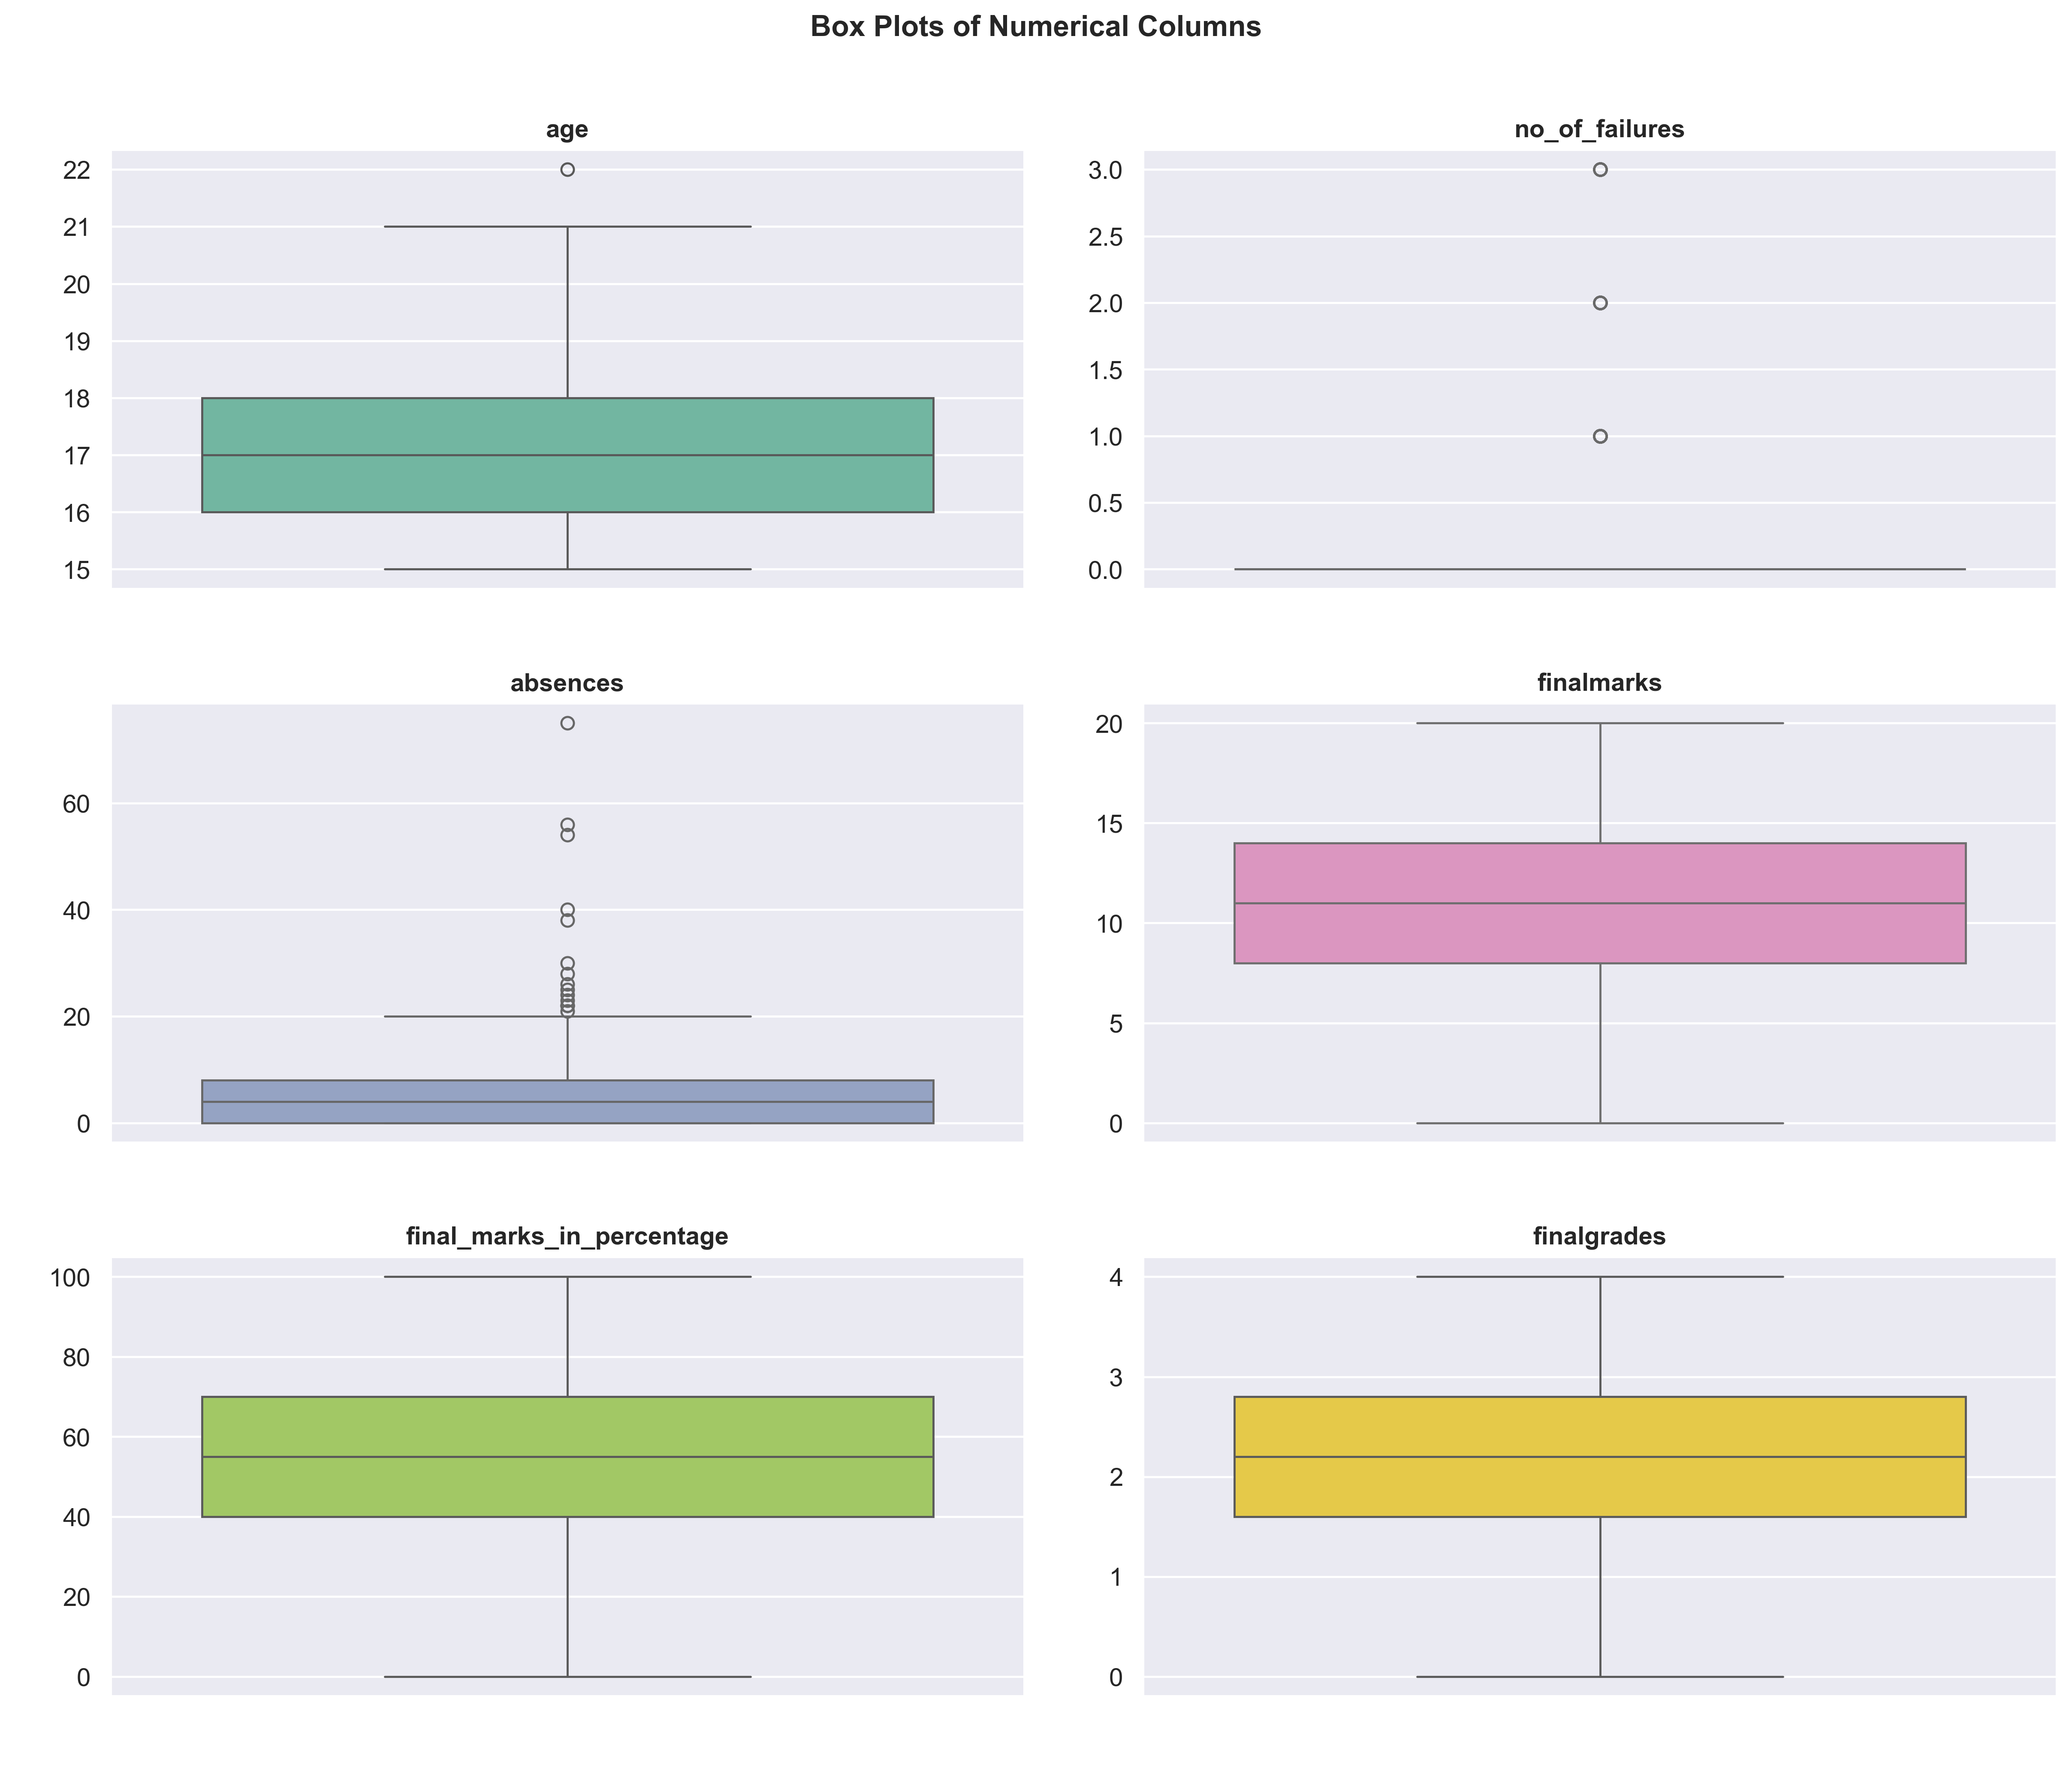

In [8]:
sns.set(style='darkgrid',palette='hls',font_scale=1.1)

fig, axes = plt.subplots(nrows=3,ncols=2, figsize=(14,12),dpi=350)
axes=axes.flatten()
colors=sns.color_palette("Set2",n_colors=len(numerical_columns))

for idx,column in enumerate(numerical_columns):
    sns.boxplot(
        y=df[column],
        ax=axes[idx],
        color=colors[idx]
    )
    axes[idx].set_title(column,fontsize=12,fontweight='bold')
    axes[idx].set_xlabel(" ")
    axes[idx].set_ylabel(" ")

    for idx in range(len(numerical_columns),len(axes)):
        fig.delaxes(axes[idx])

plt.suptitle(
    "Box Plots of Numerical Columns",
    fontsize=14,
    fontweight='bold'
)

plt.tight_layout(rect=[0,0,1,0.97])
plt.show()


In [9]:
df[numerical_columns]=df[numerical_columns].fillna(df[numerical_columns].median())

### Filling the categorical colums

In [10]:
categorical_columns = df.select_dtypes(['object','category']).columns

df[categorical_columns]=df[categorical_columns].fillna(df[categorical_columns].mode().iloc[0])

In [11]:
df.isna().sum()

sex                          0
age                          0
address                      0
FamilySize                   0
ParentStatus                 0
MotherEducation              0
FatherEducation              0
MotherJob                    0
FatherJob                    0
reason                       0
guardian                     0
traveltime_in_min            0
studytime_in_hrs             0
no_of_failures               0
SchoolSupport                0
FamilySupport                0
ExtraPaidClasses             0
activities                   0
nursery                      0
higher                       0
internet                     0
romantic                     0
FamilyRelation               0
freetime                     0
Hangout                      0
DailyAlcoholConsumption      0
WeekendAlcoholConsumption    0
health                       0
absences                     0
finalmarks                   0
final_marks_in_percentage    0
finalgrades                  0
dtype: i

### Pie Chart for Categorical Data

### Pie Chart for Numerical Data

In [12]:
plt.rcParams["figure.dpi"] = 120

Creating pie charts for 26 categorical columns...
Grid size: 9 rows x 3 cols
  Processing 1/26: sex
  Processing 2/26: address
  Processing 3/26: FamilySize
  Processing 4/26: ParentStatus
  Processing 5/26: MotherEducation
  Processing 6/26: FatherEducation
  Processing 7/26: MotherJob
  Processing 8/26: FatherJob
  Processing 9/26: reason
  Processing 10/26: guardian
  Processing 11/26: traveltime_in_min
  Processing 12/26: studytime_in_hrs
  Processing 13/26: SchoolSupport
  Processing 14/26: FamilySupport
  Processing 15/26: ExtraPaidClasses
  Processing 16/26: activities
  Processing 17/26: nursery
  Processing 18/26: higher
  Processing 19/26: internet
  Processing 20/26: romantic
  Processing 21/26: FamilyRelation
  Processing 22/26: freetime
  Processing 23/26: Hangout
  Processing 24/26: DailyAlcoholConsumption
  Processing 25/26: WeekendAlcoholConsumption
  Processing 26/26: health


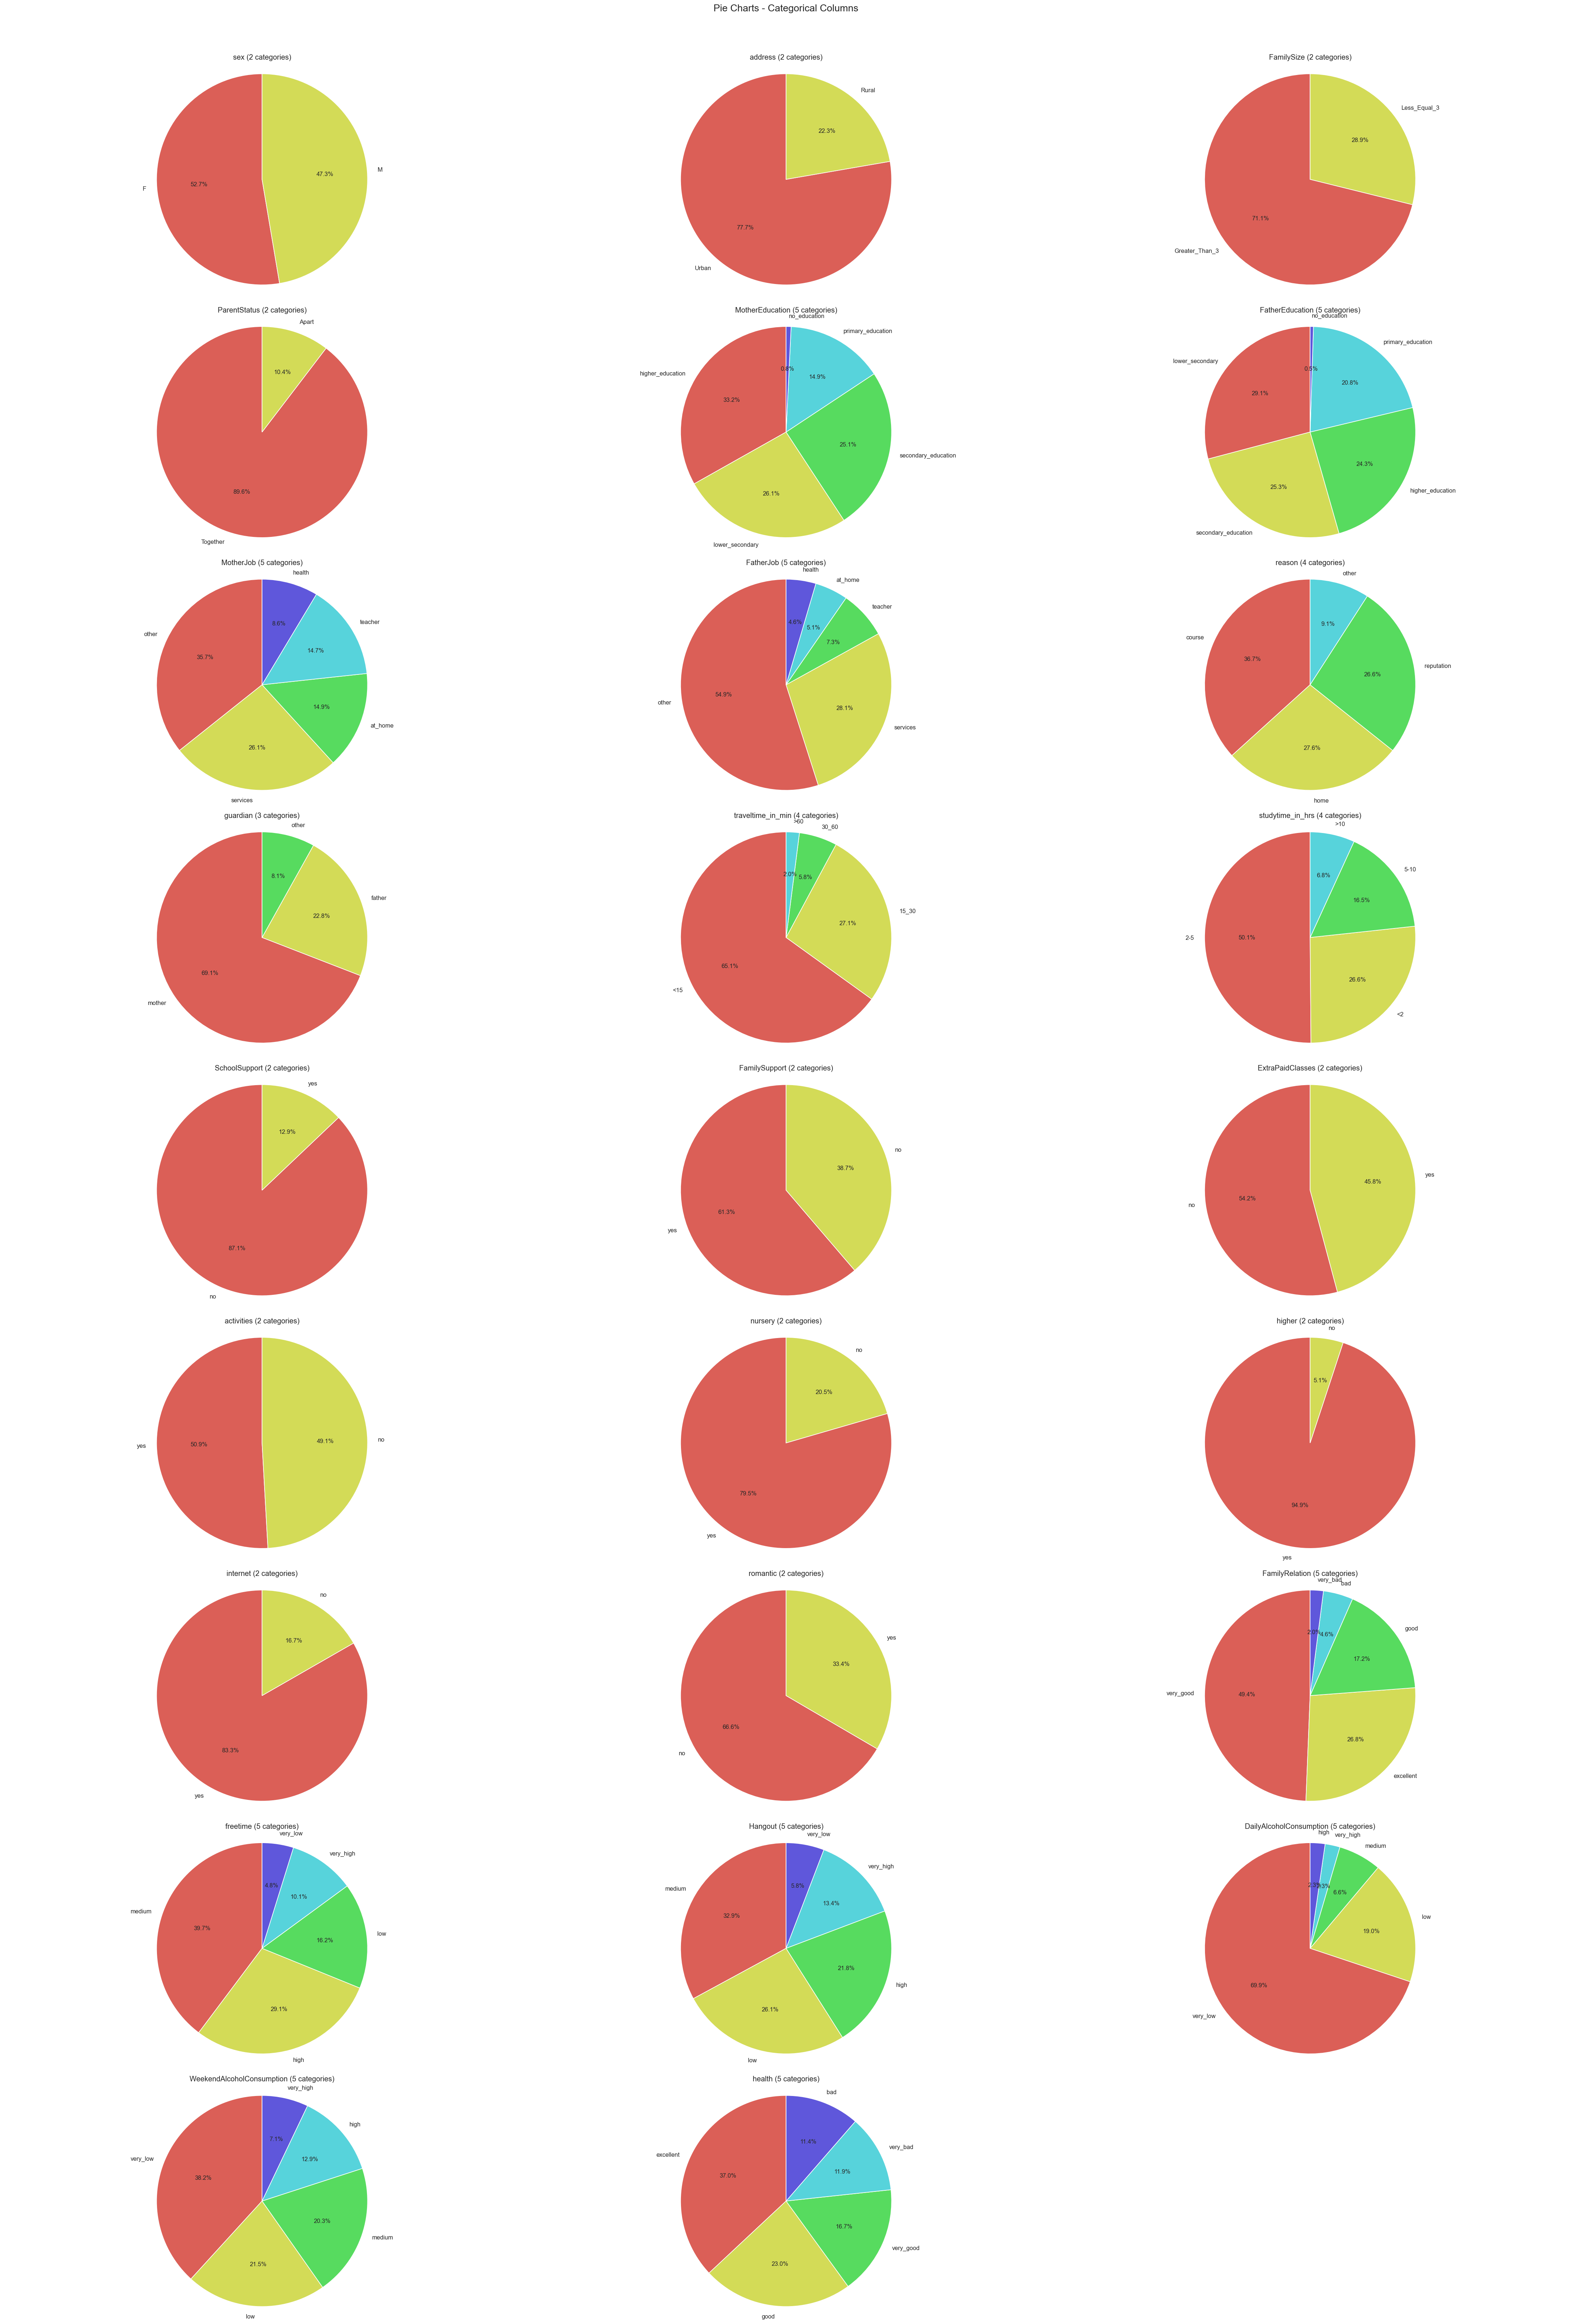

✓ Categorical pie charts complete!


In [13]:
if len(categorical_columns) > 0:
    print(f"Creating pie charts for {len(categorical_columns)} categorical columns...")
    n_cols = 3
    n_rows = (len(categorical_columns) + n_cols - 1) // n_cols
    print(f"Grid size: {n_rows} rows x {n_cols} cols")
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(12*n_cols, 6*n_rows))
    
    # Handle single subplot case
    if len(categorical_columns) == 1:
        axes = np.array([axes])
    
    # Flatten axes for easy iteration
    axes_flat = axes.flatten()
    
    for idx, col in enumerate(categorical_columns):
        print(f"  Processing {idx+1}/{len(categorical_columns)}: {col}")
        value_counts = df[col].value_counts()
        font_size = max(6, 10 - len(value_counts) * 0.05)
        
        axes_flat[idx].pie(value_counts.values, labels=value_counts.index, 
                          autopct='%1.1f%%', startangle=90, 
                          textprops={'fontsize': font_size})
        axes_flat[idx].set_title(f'{col} ({len(value_counts)} categories)', fontsize=12)
        axes_flat[idx].axis('equal')
    
    # Hide empty subplots
    for idx in range(len(categorical_columns), len(axes_flat)):
        axes_flat[idx].axis('off')
    
plt.suptitle('Pie Charts - Categorical Columns', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()
print("✓ Categorical pie charts complete!")


=== Creating Pie Charts for Numerical Columns ===
Creating pie charts for 6 numerical columns...
Grid size: 2 rows x 3 cols
  Processing 1/6: age
  Processing 2/6: no_of_failures
  Processing 3/6: absences
  Processing 4/6: finalmarks
  Processing 5/6: final_marks_in_percentage
  Processing 6/6: finalgrades


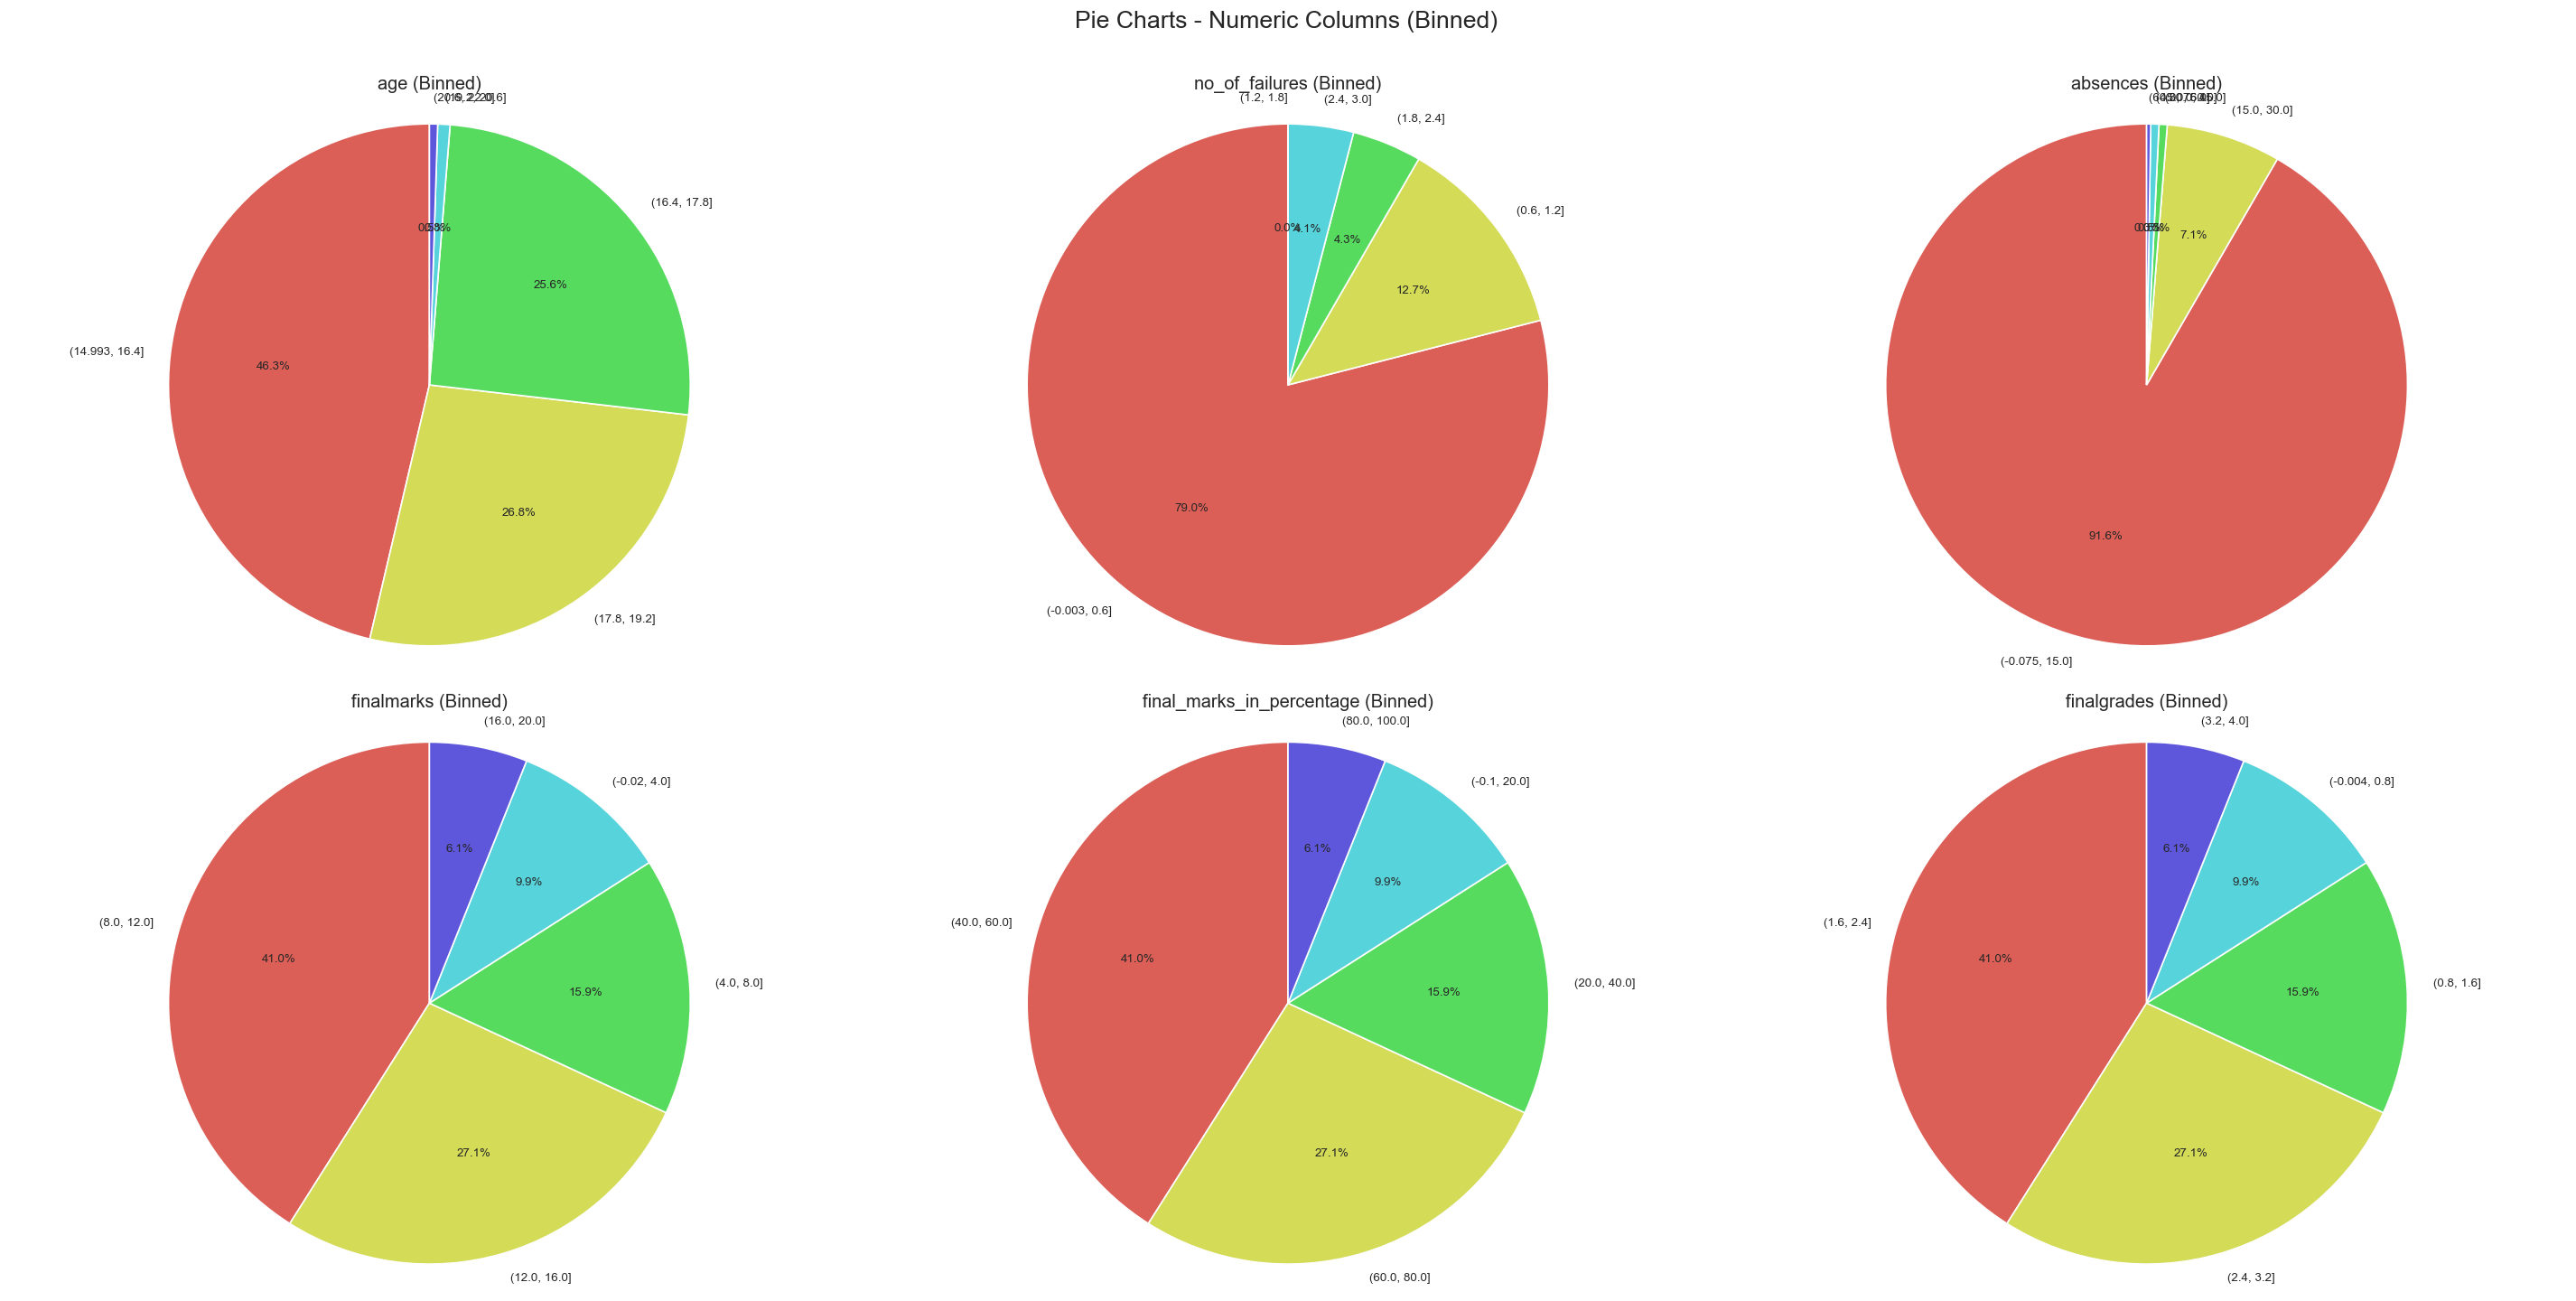

In [14]:
print("\n=== Creating Pie Charts for Numerical Columns ===")

if len(numerical_columns) > 0:
    print(f"Creating pie charts for {len(numerical_columns)} numerical columns...")
    n_cols = 3
    n_rows = (len(numerical_columns) + n_cols - 1) // n_cols
    print(f"Grid size: {n_rows} rows x {n_cols} cols")
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(8*n_cols, 6*n_rows))
    
    # Handle single subplot case
    if len(numerical_columns) == 1:
        axes = np.array([axes])
    
    # Flatten axes for easy iteration
    axes_flat = axes.flatten()
    
    for idx, col in enumerate(numerical_columns):
        print(f"  Processing {idx+1}/{len(numerical_columns)}: {col}")
        binned_data = pd.cut(df[col], bins=5)
        value_counts = binned_data.value_counts()
        
        axes_flat[idx].pie(value_counts.values, labels=value_counts.index, 
                          autopct='%1.1f%%', startangle=90, textprops={'fontsize': 8})
        axes_flat[idx].set_title(f'{col} (Binned)', fontsize=12)
        axes_flat[idx].axis('equal')
    
    # Hide empty subplots
    for idx in range(len(numerical_columns), len(axes_flat)):
        axes_flat[idx].axis('off')
    
    plt.suptitle('Pie Charts - Numeric Columns (Binned)', fontsize=16, y=1.00)
    plt.tight_layout()
    plt.show()

### Hexbin Plot

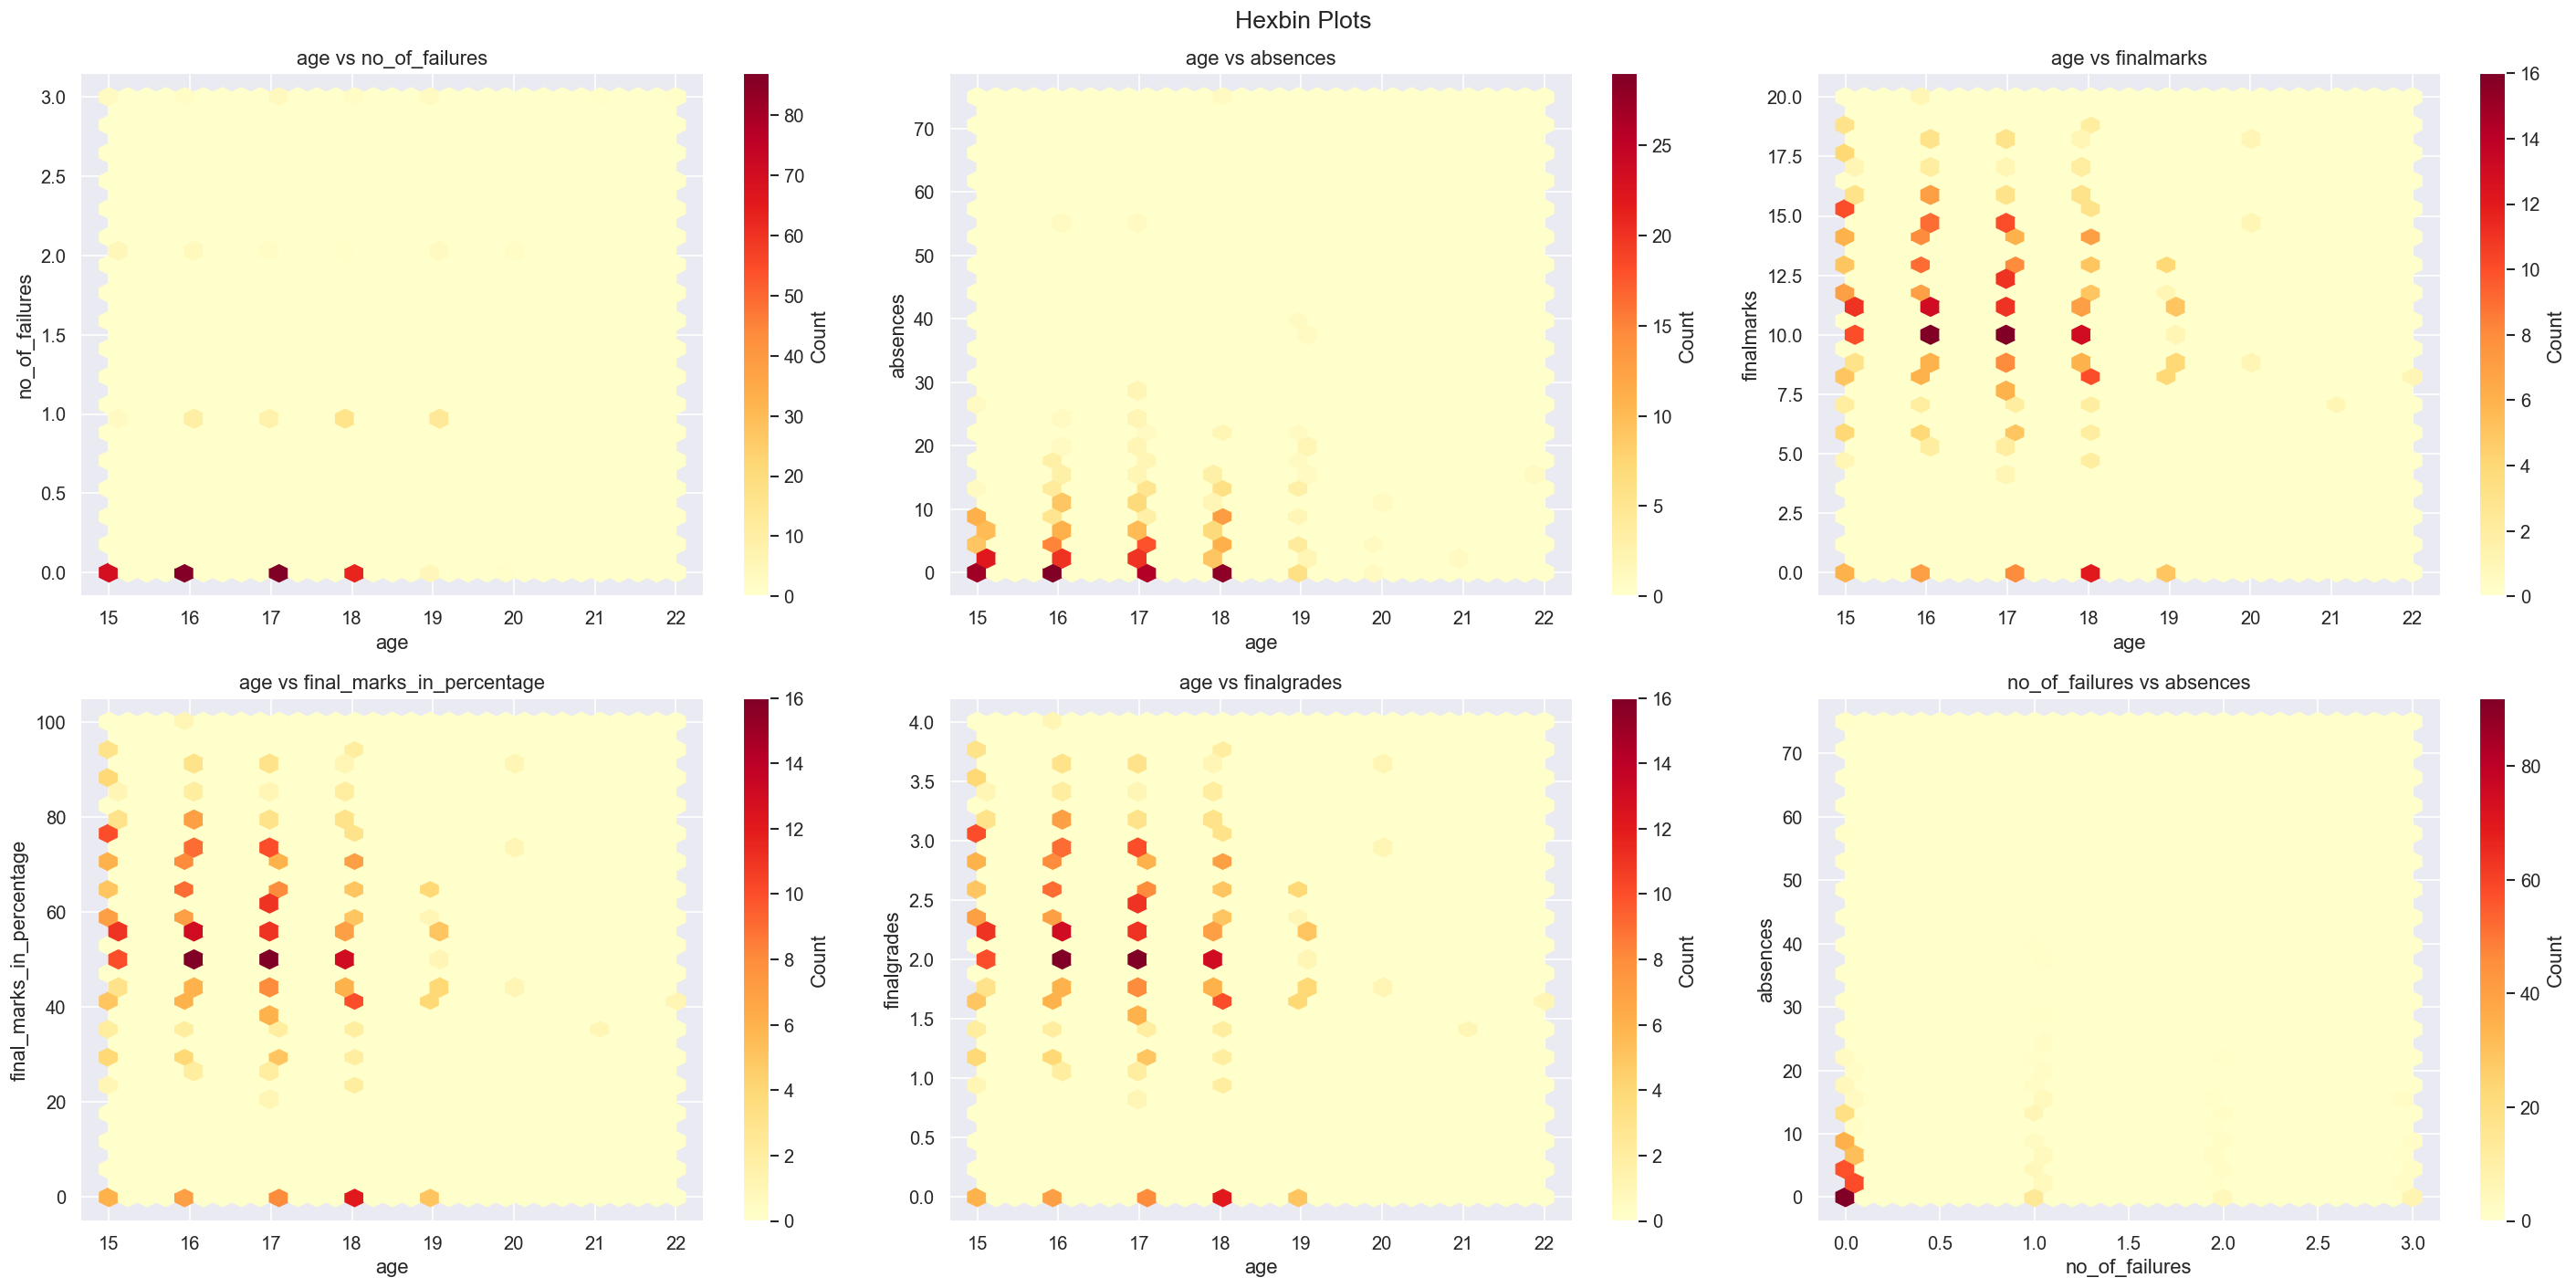

In [15]:
if len(numerical_columns) >= 2:
    # Create hexbin for multiple pairs
    n_plots = min(6, len(numerical_columns) * (len(numerical_columns) - 1) // 2)
    n_cols = 3
    n_rows = (n_plots + n_cols - 1) // n_cols
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(8*n_cols, 6*n_rows))
    axes = axes.flatten() if n_plots > 1 else [axes]
    
    plot_idx = 0
    for i in range(len(numerical_columns)):
        for j in range(i+1, len(numerical_columns)):
            if plot_idx >= n_plots:
                break
            
            hb = axes[plot_idx].hexbin(df[numerical_columns[i]], df[numerical_columns[j]], 
                                       gridsize=30, cmap='YlOrRd')
            axes[plot_idx].set_xlabel(numerical_columns[i])
            axes[plot_idx].set_ylabel(numerical_columns[j])
            axes[plot_idx].set_title(f'{numerical_columns[i]} vs {numerical_columns[j]}')
            plt.colorbar(hb, ax=axes[plot_idx], label='Count')
            plot_idx += 1
        if plot_idx >= n_plots:
            break
    
    # Hide empty subplots
    for idx in range(plot_idx, len(axes)):
        axes[idx].axis('off')
    
    plt.suptitle('Hexbin Plots', fontsize=16)
    plt.tight_layout()
    plt.show()


### Correlation Matrix

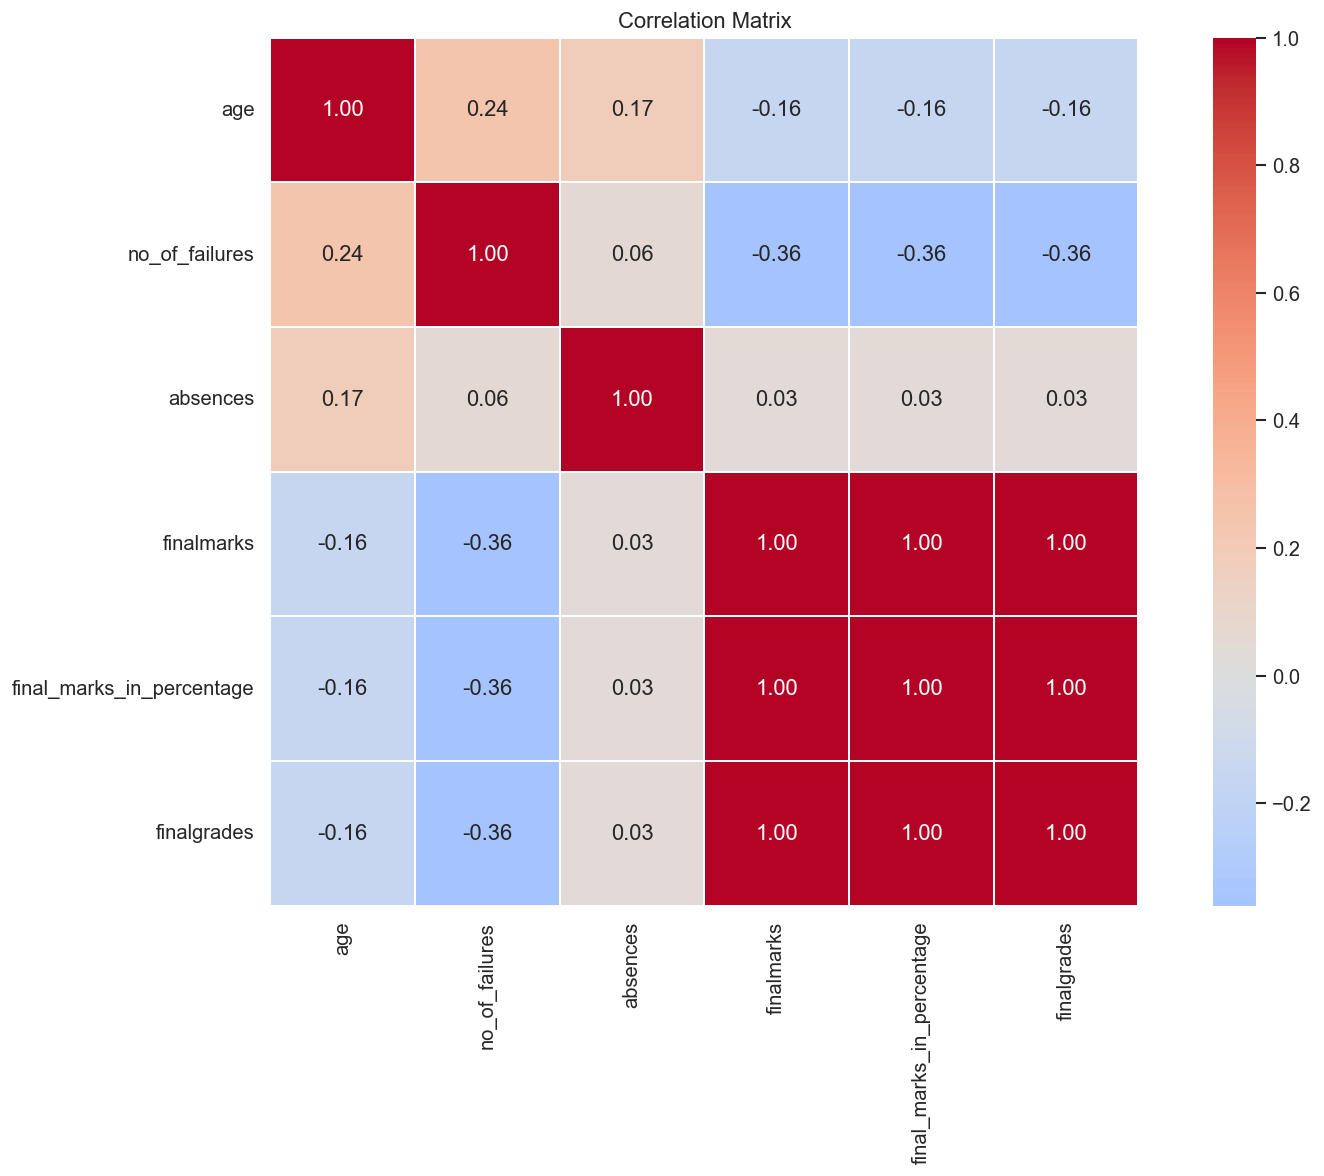

In [16]:
if len(numerical_columns) >= 2:
    plt.figure(figsize=(14, 10))
    correlation_matrix = df[numerical_columns].corr()
    sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
                center=0, square=True, linewidths=1)
    plt.title('Correlation Matrix')
    plt.tight_layout()
    plt.show()


### Contour Plot

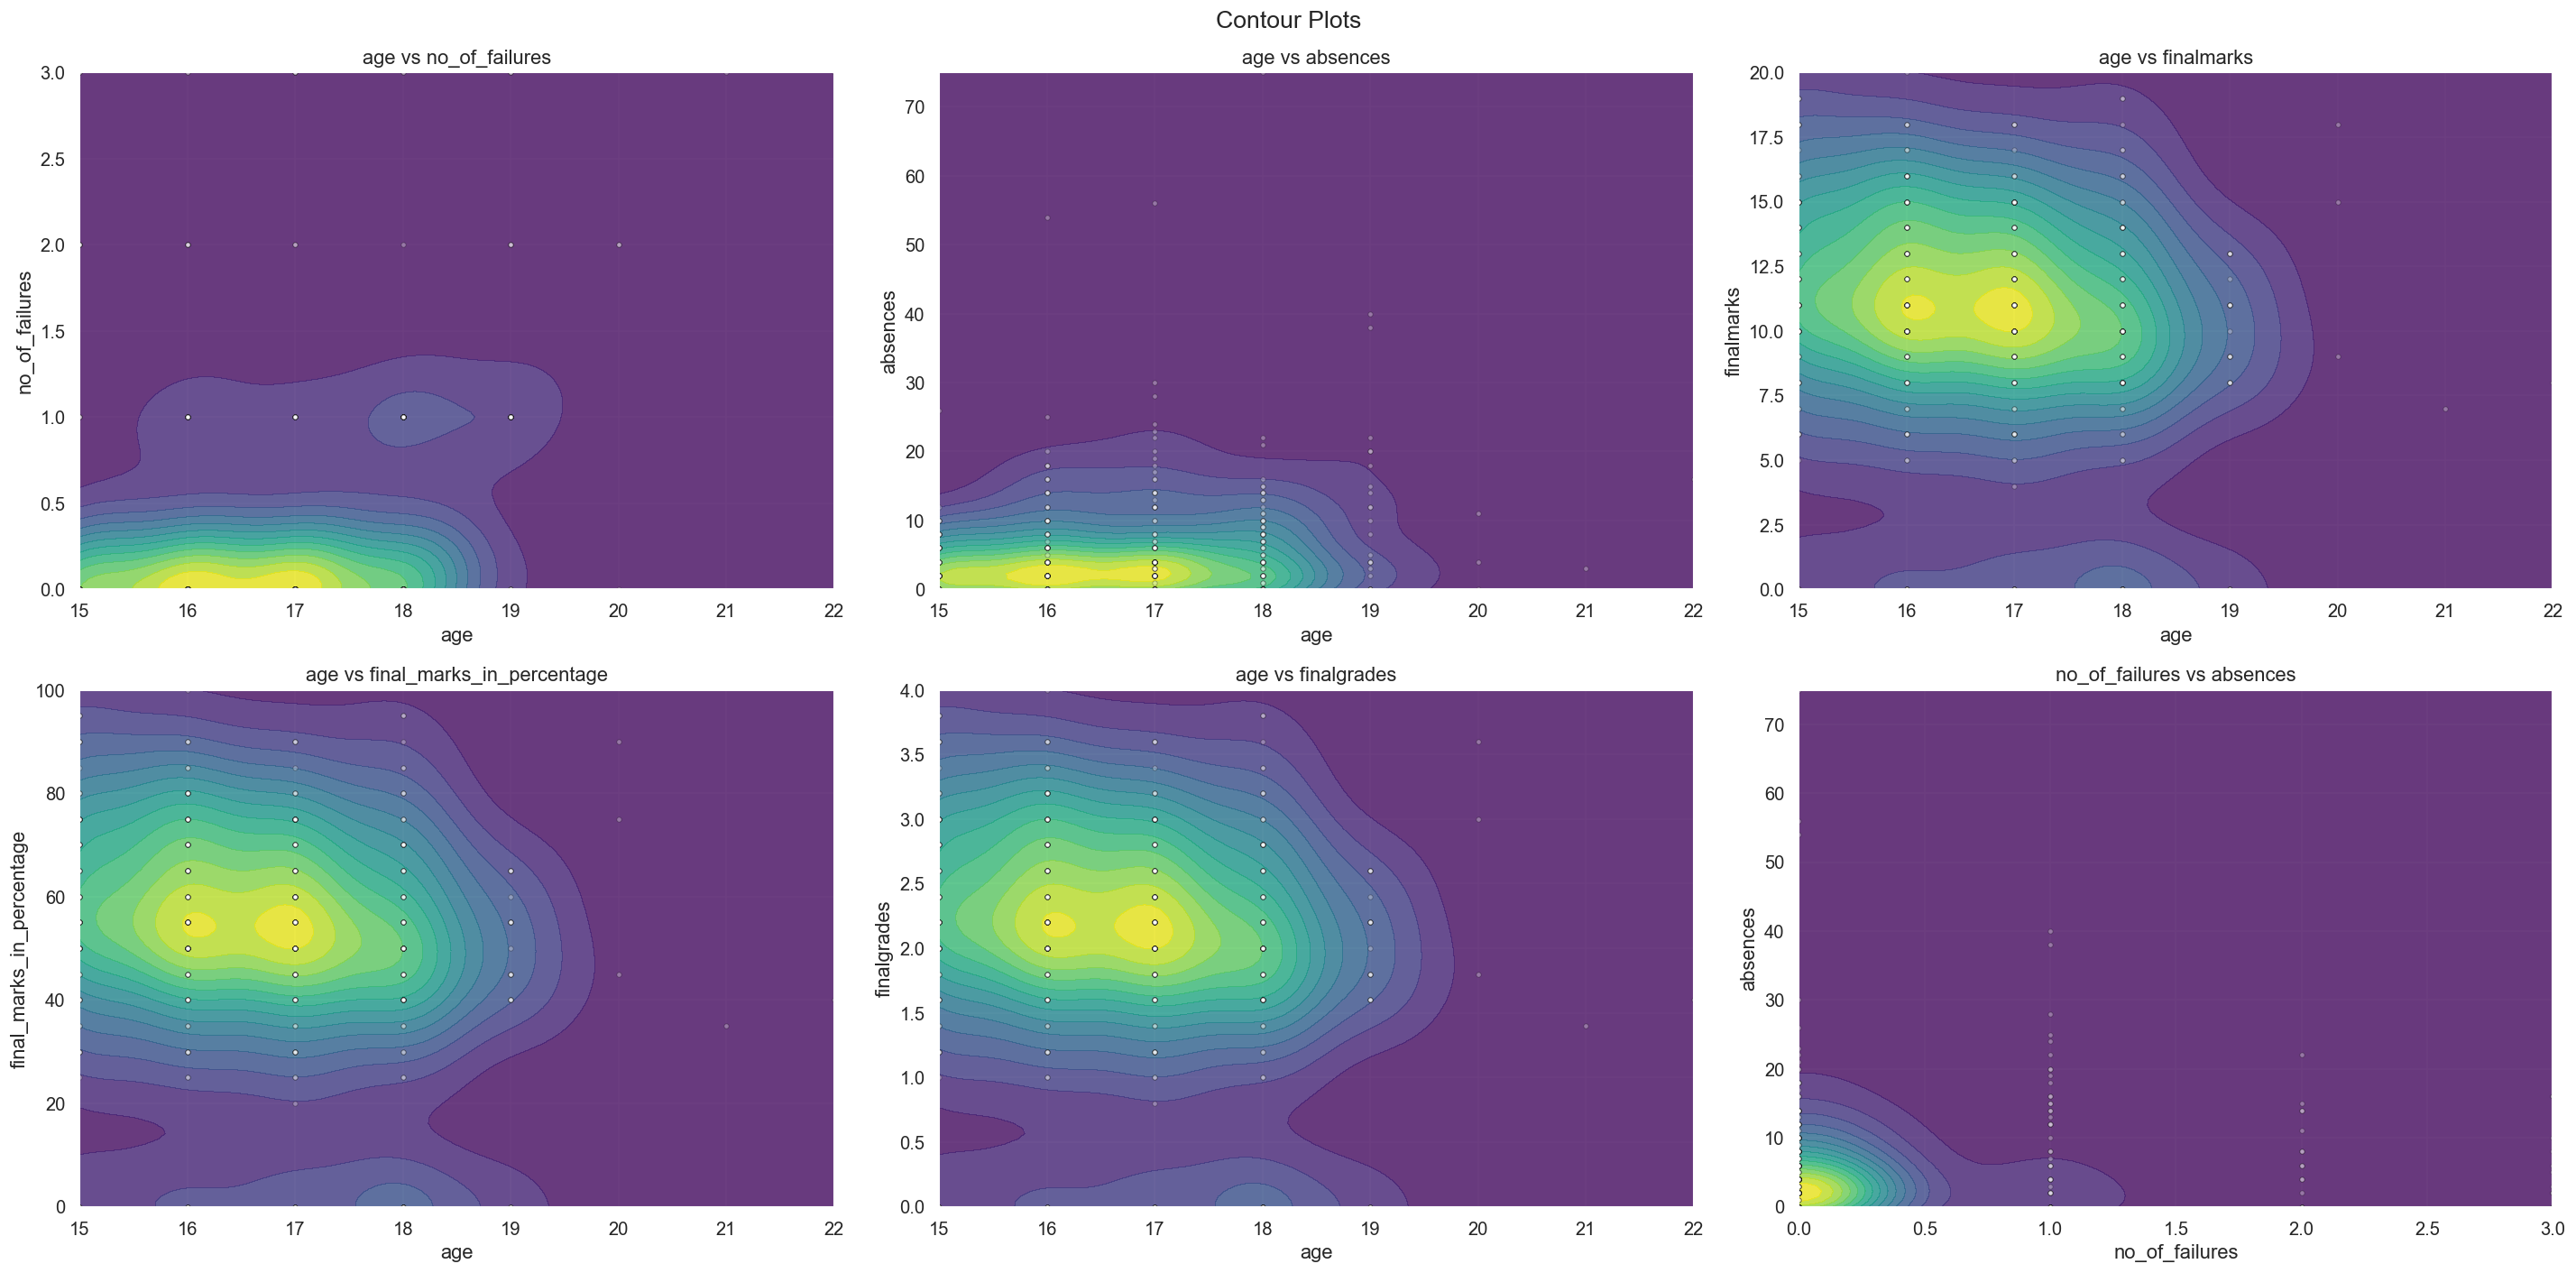

✓ Contour plots complete!


In [17]:
if len(numerical_columns) >= 2:
    n_plots = min(6, len(numerical_columns) * (len(numerical_columns) - 1) // 2)
    n_cols = 3
    n_rows = (n_plots + n_cols - 1) // n_cols
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(8*n_cols, 6*n_rows))
    axes_flat = axes.flatten() if n_plots > 1 else [axes]
    
    plot_idx = 0
    for i in range(len(numerical_columns)):
        for j in range(i+1, len(numerical_columns)):
            if plot_idx >= n_plots:
                break
            
            # Get valid data
            valid_idx = df[[numerical_columns[i], numerical_columns[j]]].dropna().index
            x = df.loc[valid_idx, numerical_columns[i]]
            y = df.loc[valid_idx, numerical_columns[j]]
            
            if len(x) > 10:
                xmin, xmax = x.min(), x.max()
                ymin, ymax = y.min(), y.max()
                
                xx, yy = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]
                positions = np.vstack([xx.ravel(), yy.ravel()])
                values = np.vstack([x, y])
                kernel = stats.gaussian_kde(values)
                zz = np.reshape(kernel(positions).T, xx.shape)
                
                axes_flat[plot_idx].contourf(xx, yy, zz, levels=15, cmap='viridis', alpha=0.8)
                axes_flat[plot_idx].scatter(x, y, c='white', s=10, alpha=0.3, edgecolors='black', linewidth=0.5)
                axes_flat[plot_idx].set_xlabel(numerical_columns[i])
                axes_flat[plot_idx].set_ylabel(numerical_columns[j])
                axes_flat[plot_idx].set_title(f'{numerical_columns[i]} vs {numerical_columns[j]}')
            
            plot_idx += 1
        if plot_idx >= n_plots:
            break
    
    # Hide empty subplots
    for idx in range(plot_idx, len(axes_flat)):
        axes_flat[idx].axis('off')
    
    plt.suptitle('Contour Plots', fontsize=16)
    plt.tight_layout()
    plt.show()
    print("✓ Contour plots complete!")

### Radar Chart

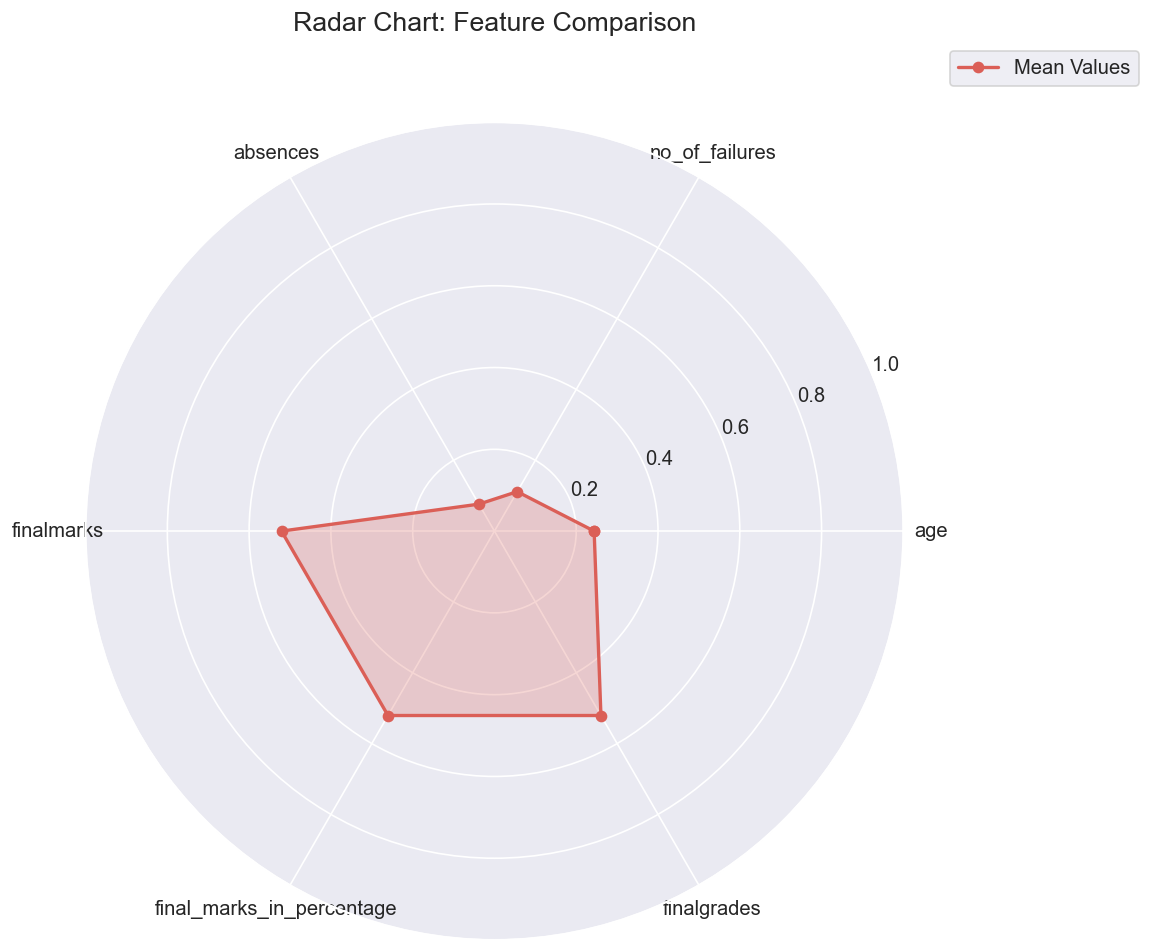

✓ Radar chart complete!


In [18]:
if len(numerical_columns) >= 3:
    # Normalize the data for radar chart
    normalized_df = (df[numerical_columns[:6]] - df[numerical_columns[:6]].min()) / (df[numerical_columns[:6]].max() - df[numerical_columns[:6]].min())
    
    # Take mean values
    values = normalized_df.mean().values
    categories = numerical_columns[:6]
    
    N = len(categories)
    angles = np.linspace(0, 2 * np.pi, N, endpoint=False).tolist()
    values = values.tolist()
    
    # Complete the circle
    values += values[:1]
    angles += angles[:1]
    
    fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(projection='polar'))
    ax.plot(angles, values, 'o-', linewidth=2, label='Mean Values')
    ax.fill(angles, values, alpha=0.25)
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(categories)
    ax.set_ylim(0, 1)
    ax.set_title('Radar Chart: Feature Comparison', size=16, y=1.1)
    ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))
    plt.tight_layout()
    plt.show()
    print("✓ Radar chart complete!")

### Polar Plots

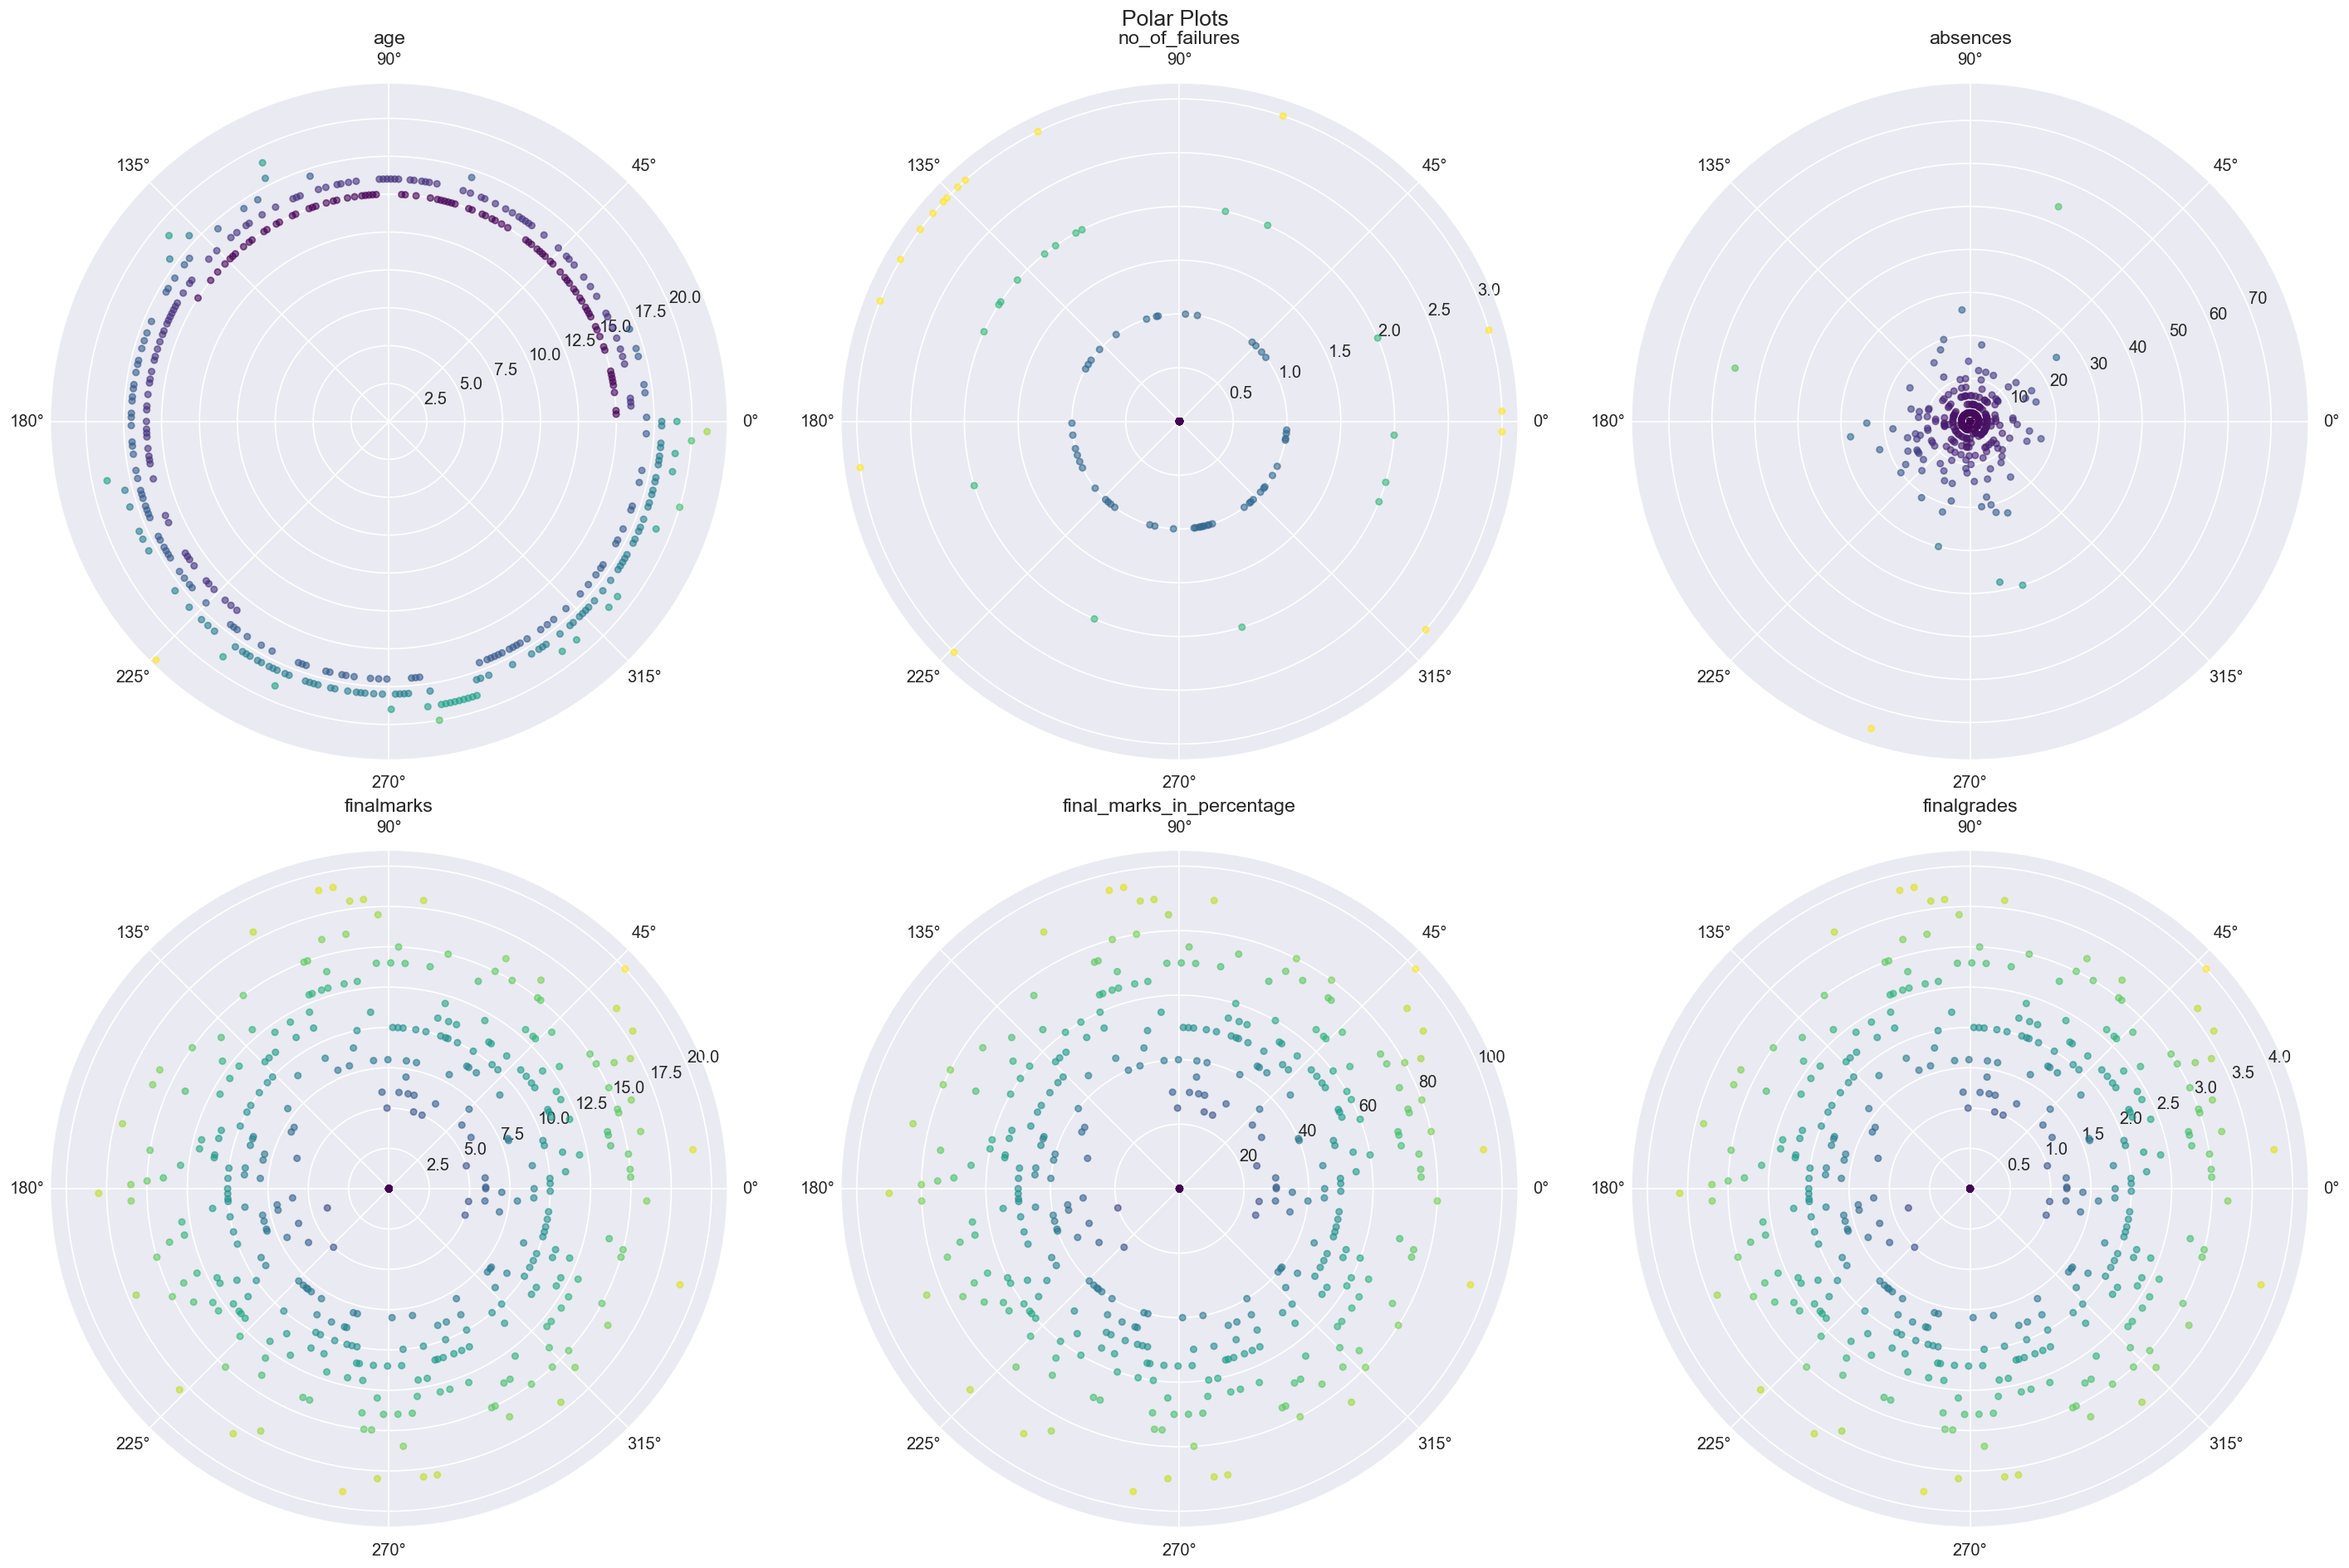

✓ Polar plots complete!


In [19]:
if len(numerical_columns) >= 1:
    n_plots = min(6, len(numerical_columns))
    n_cols = 3
    n_rows = (n_plots + n_cols - 1) // n_cols
    
    fig = plt.figure(figsize=(8*n_cols, 8*n_rows))
    
    for idx, col in enumerate(numerical_columns[:n_plots]):
        ax = fig.add_subplot(n_rows, n_cols, idx+1, projection='polar')
        
        theta = np.linspace(0, 2 * np.pi, len(df))
        r = df[col].values
        
        # Handle any NaN values
        mask = ~np.isnan(r)
        theta = theta[mask]
        r = r[mask]
        
        ax.scatter(theta, r, c=r, cmap='viridis', s=20, alpha=0.6)
        ax.set_title(f'{col}', size=14)
    
    plt.suptitle('Polar Plots', fontsize=16, y=0.98)
    plt.tight_layout()
    plt.show()
    print("✓ Polar plots complete!")


### Butterfly plot

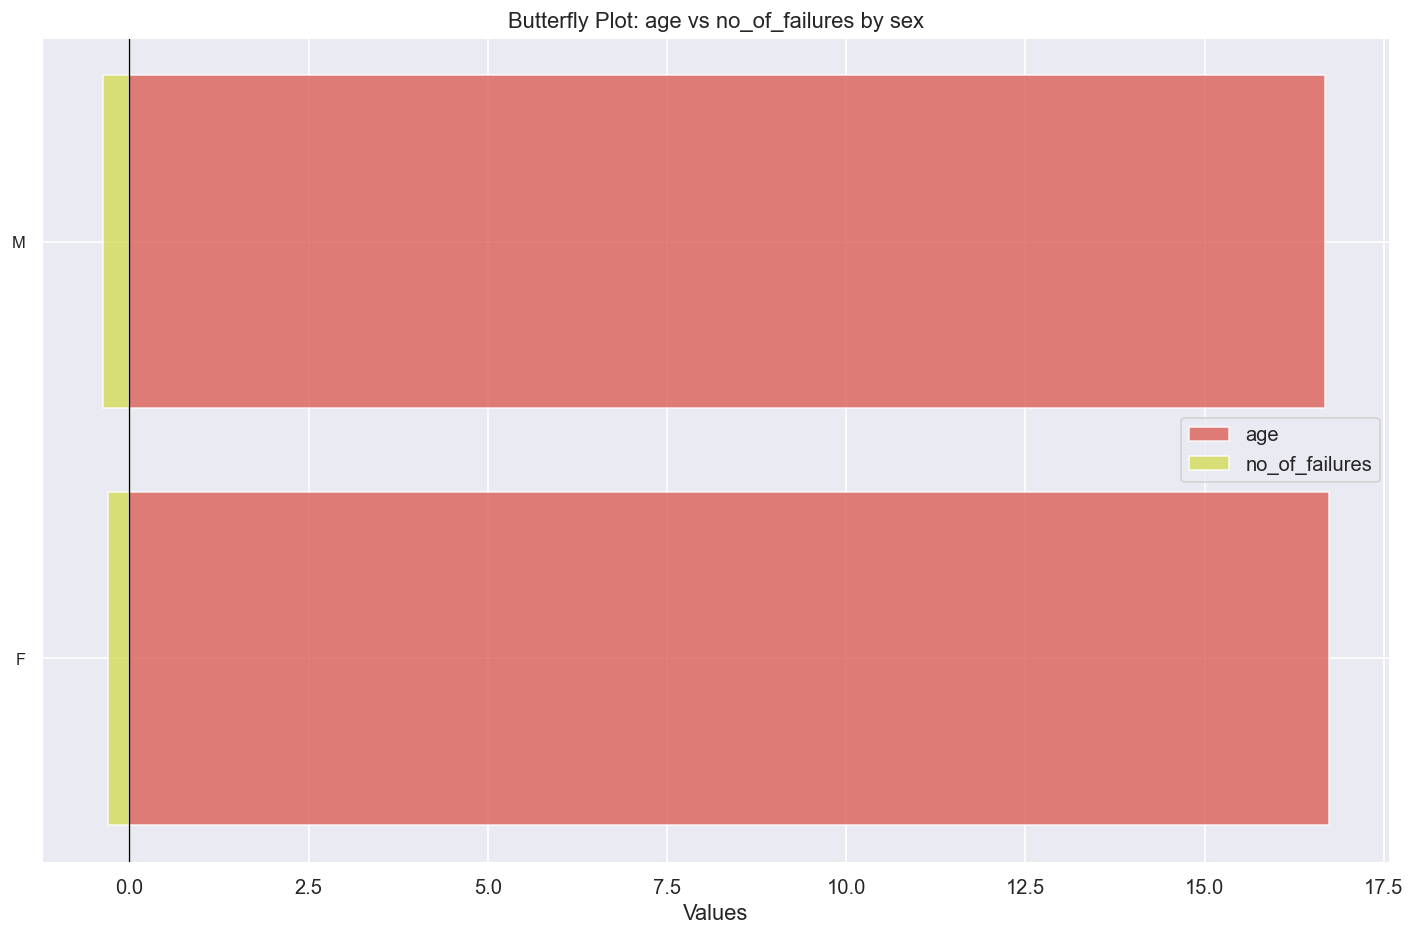

✓ Butterfly plot complete!


In [20]:
if len(categorical_columns) >= 1 and len(numerical_columns) >= 2:
    # Group by categorical variable and get means
    grouped = df.groupby(categorical_columns[0])[[numerical_columns[0], numerical_columns[1]]].mean()
    
    fig, ax = plt.subplots(figsize=(12, max(8, len(grouped) * 0.5)))
    
    y_pos = np.arange(len(grouped))
    
    ax.barh(y_pos, grouped[numerical_columns[0]], align='center', alpha=0.8, label=numerical_columns[0])
    ax.barh(y_pos, -grouped[numerical_columns[1]], align='center', alpha=0.8, label=numerical_columns[1])
    
    ax.set_yticks(y_pos)
    ax.set_yticklabels(grouped.index, fontsize=max(6, 10 - len(grouped) * 0.1))
    ax.axvline(0, color='black', linewidth=0.8)
    ax.set_xlabel('Values')
    ax.set_title(f'Butterfly Plot: {numerical_columns[0]} vs {numerical_columns[1]} by {categorical_columns[0]}')
    ax.legend()
    plt.tight_layout()
    plt.show()
    print("✓ Butterfly plot complete!")

### Swarm Plots

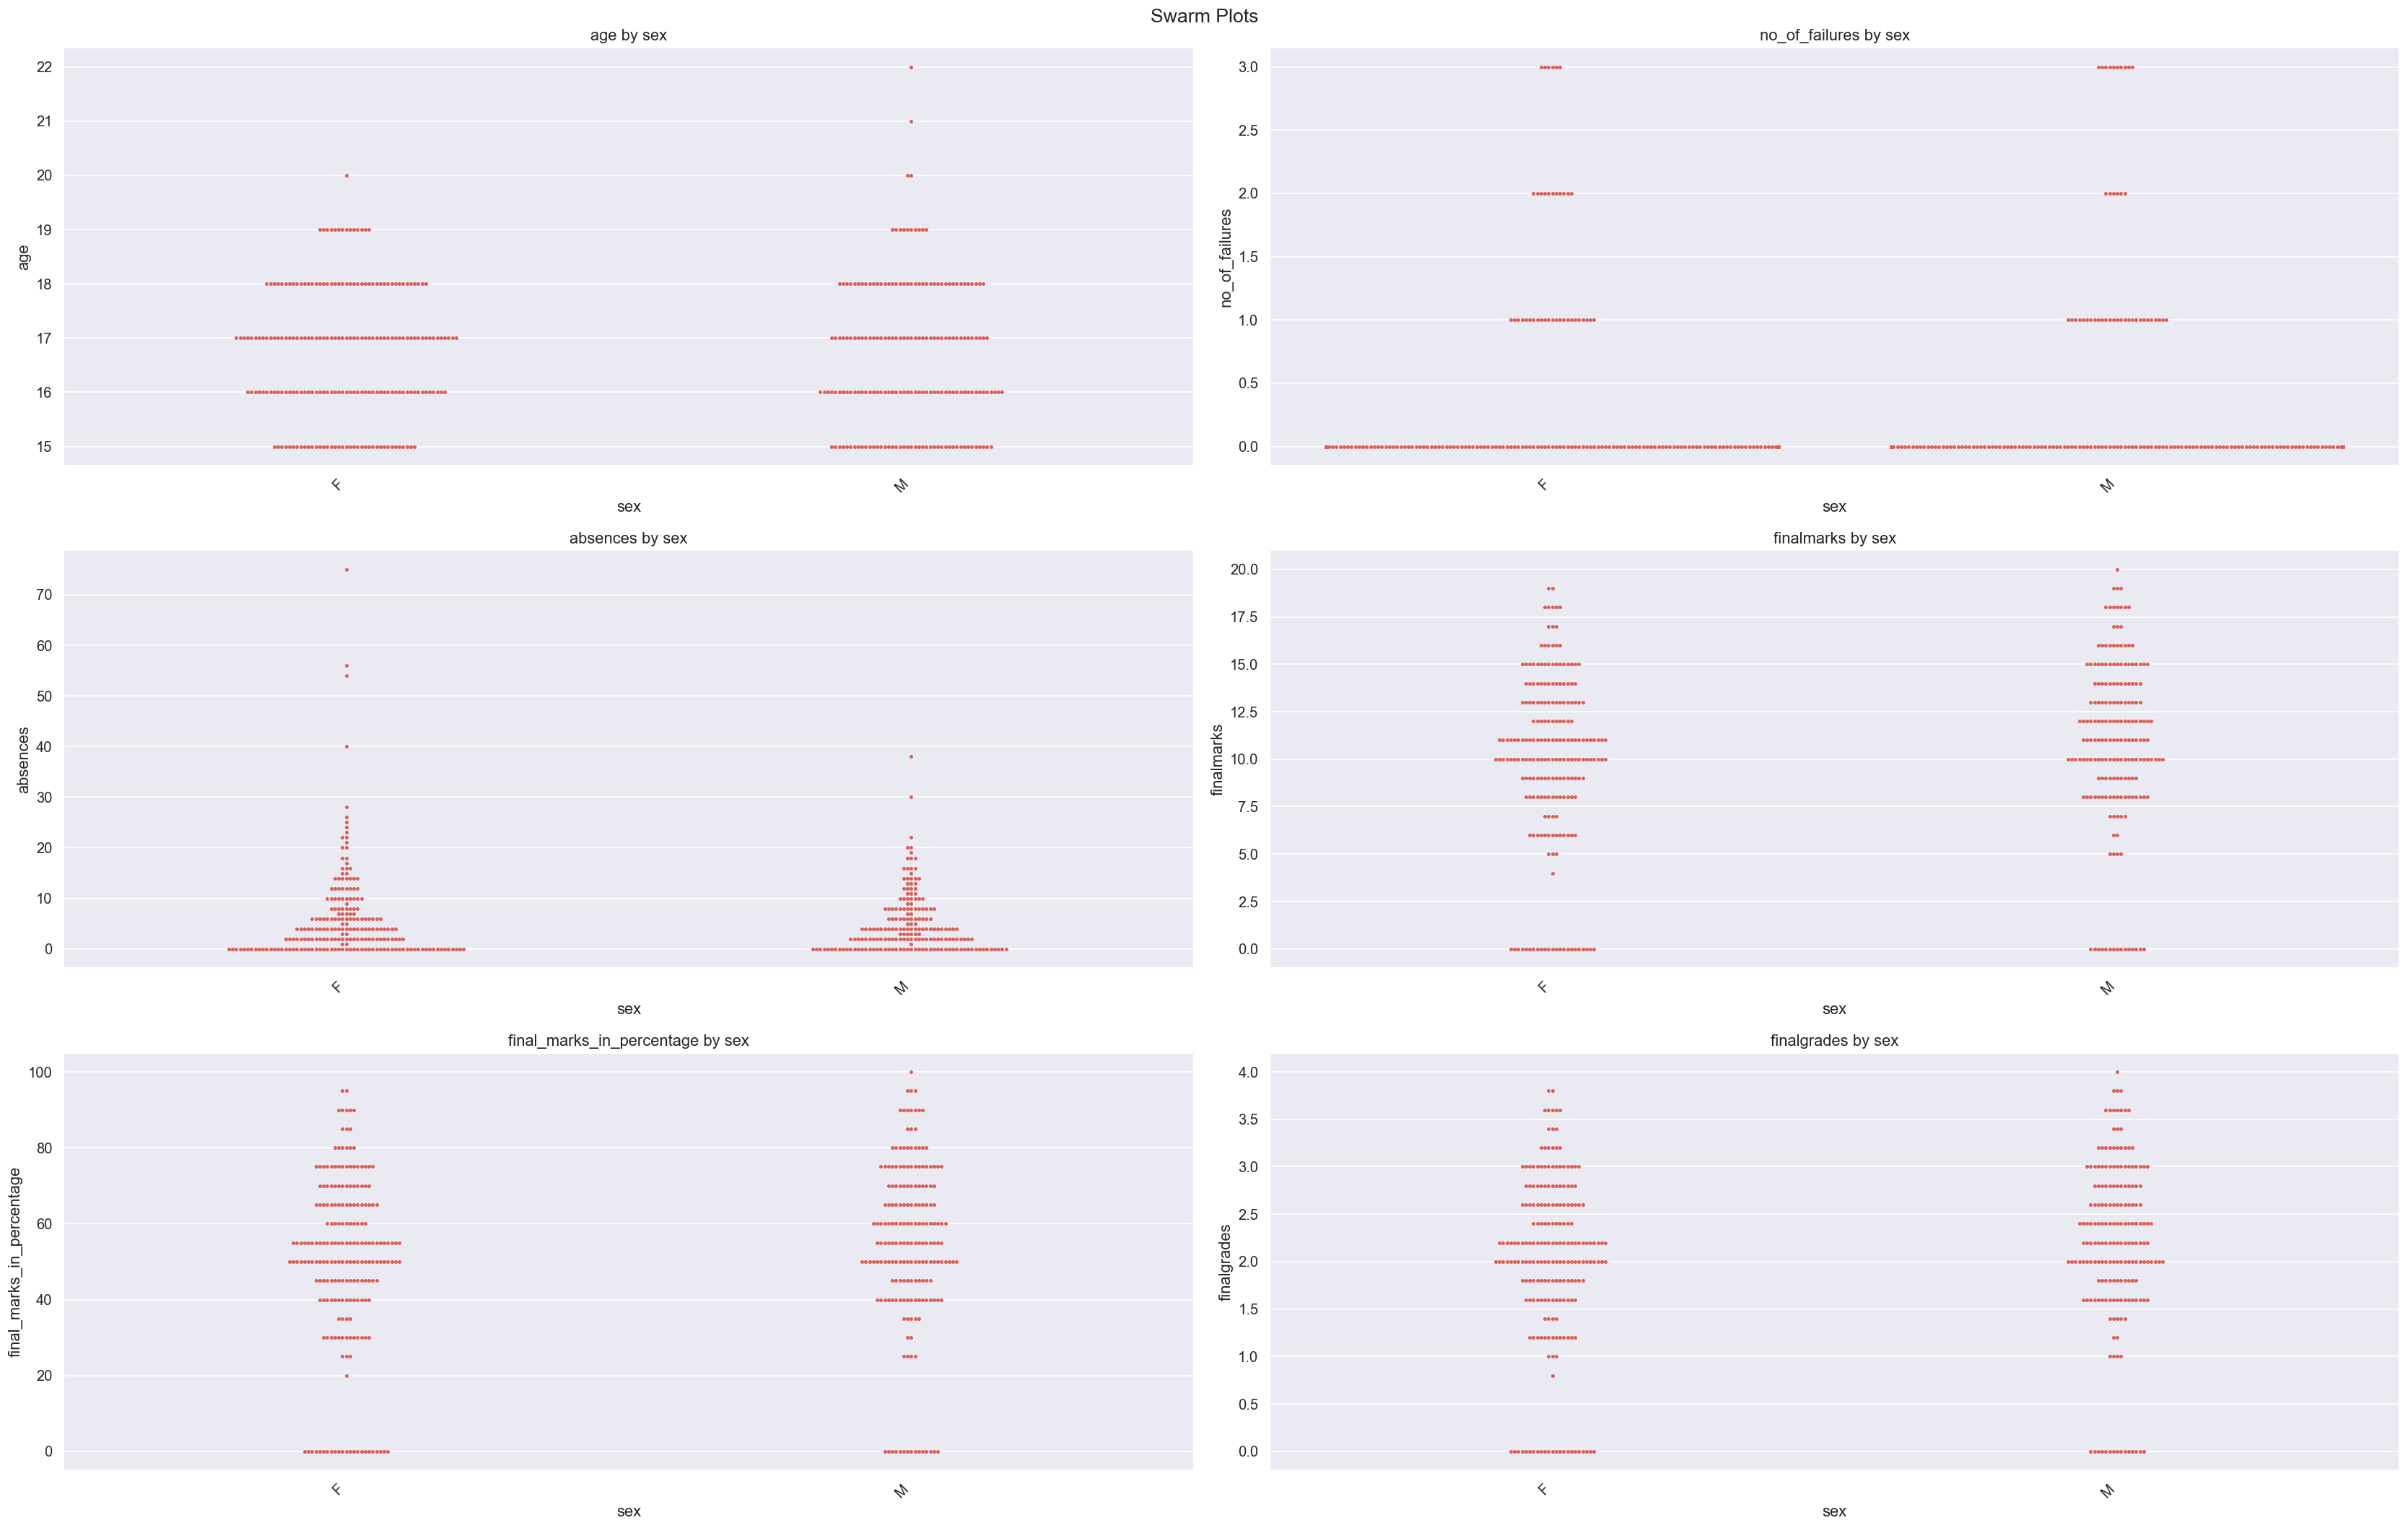

✓ Swarm plots complete!


In [21]:
if len(categorical_columns) >= 1 and len(numerical_columns) >= 1:
    n_plots = min(6, len(numerical_columns))
    n_cols = 2
    n_rows = (n_plots + n_cols - 1) // n_cols
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(14*n_cols, 6*n_rows))
    if n_plots == 1:
        axes = np.array([axes])
    
    axes_flat = axes.flatten()
    
    for idx, col in enumerate(numerical_columns[:n_plots]):
        sns.swarmplot(data=df, x=categorical_columns[0], y=col, size=3, ax=axes_flat[idx])
        axes_flat[idx].set_xticklabels(axes_flat[idx].get_xticklabels(), rotation=45, ha='right')
        axes_flat[idx].set_title(f'{col} by {categorical_columns[0]}')
    
    # Hide empty subplots
    for idx in range(n_plots, len(axes_flat)):
        axes_flat[idx].axis('off')
    
    plt.suptitle('Swarm Plots', fontsize=16)
    plt.tight_layout()
    plt.show()
    print("✓ Swarm plots complete!")
    


=== Creating Pair Plot ===


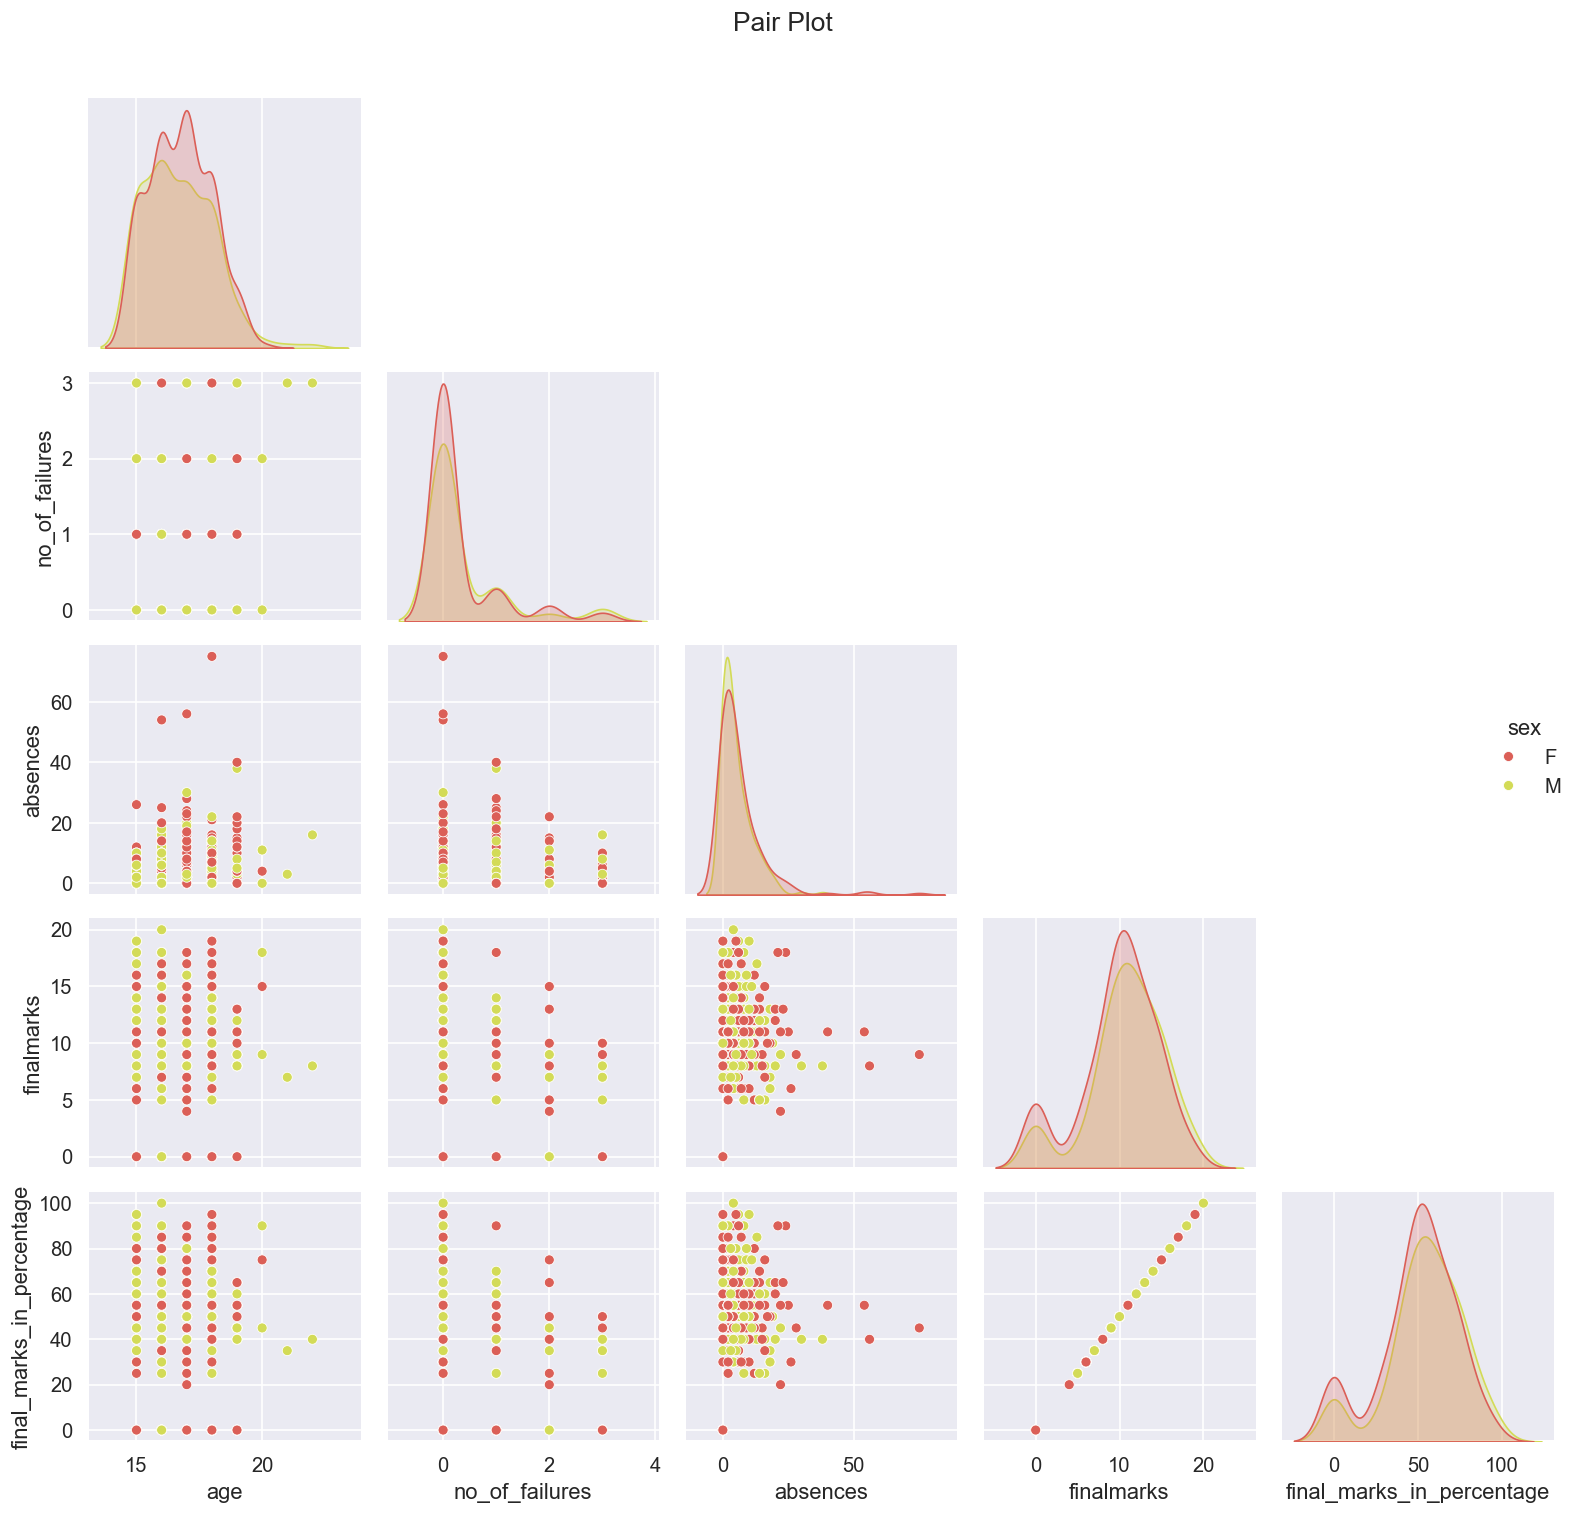

✓ Pair plot complete!


In [22]:
print("\n=== Creating Pair Plot ===")

if len(numerical_columns) >= 2:
    cols_to_plot = list(numerical_columns[:5])  # Ensure it's a list
    
    if len(categorical_columns) > 0:
        top_category = df[categorical_columns[0]].value_counts().head(3).index
        filtered_df = df[df[categorical_columns[0]].isin(top_category)]
        
        # Create list of columns for pair plot
        pairplot_cols = cols_to_plot + [categorical_columns[0]]
        
        sns.pairplot(filtered_df[pairplot_cols], 
                     hue=categorical_columns[0], diag_kind='kde', corner=True)
    else:
        sns.pairplot(df[cols_to_plot], diag_kind='kde', corner=True)
    
    plt.suptitle('Pair Plot', y=1.01)
    plt.tight_layout()
    plt.show()
    print("✓ Pair plot complete!")

### Histogram

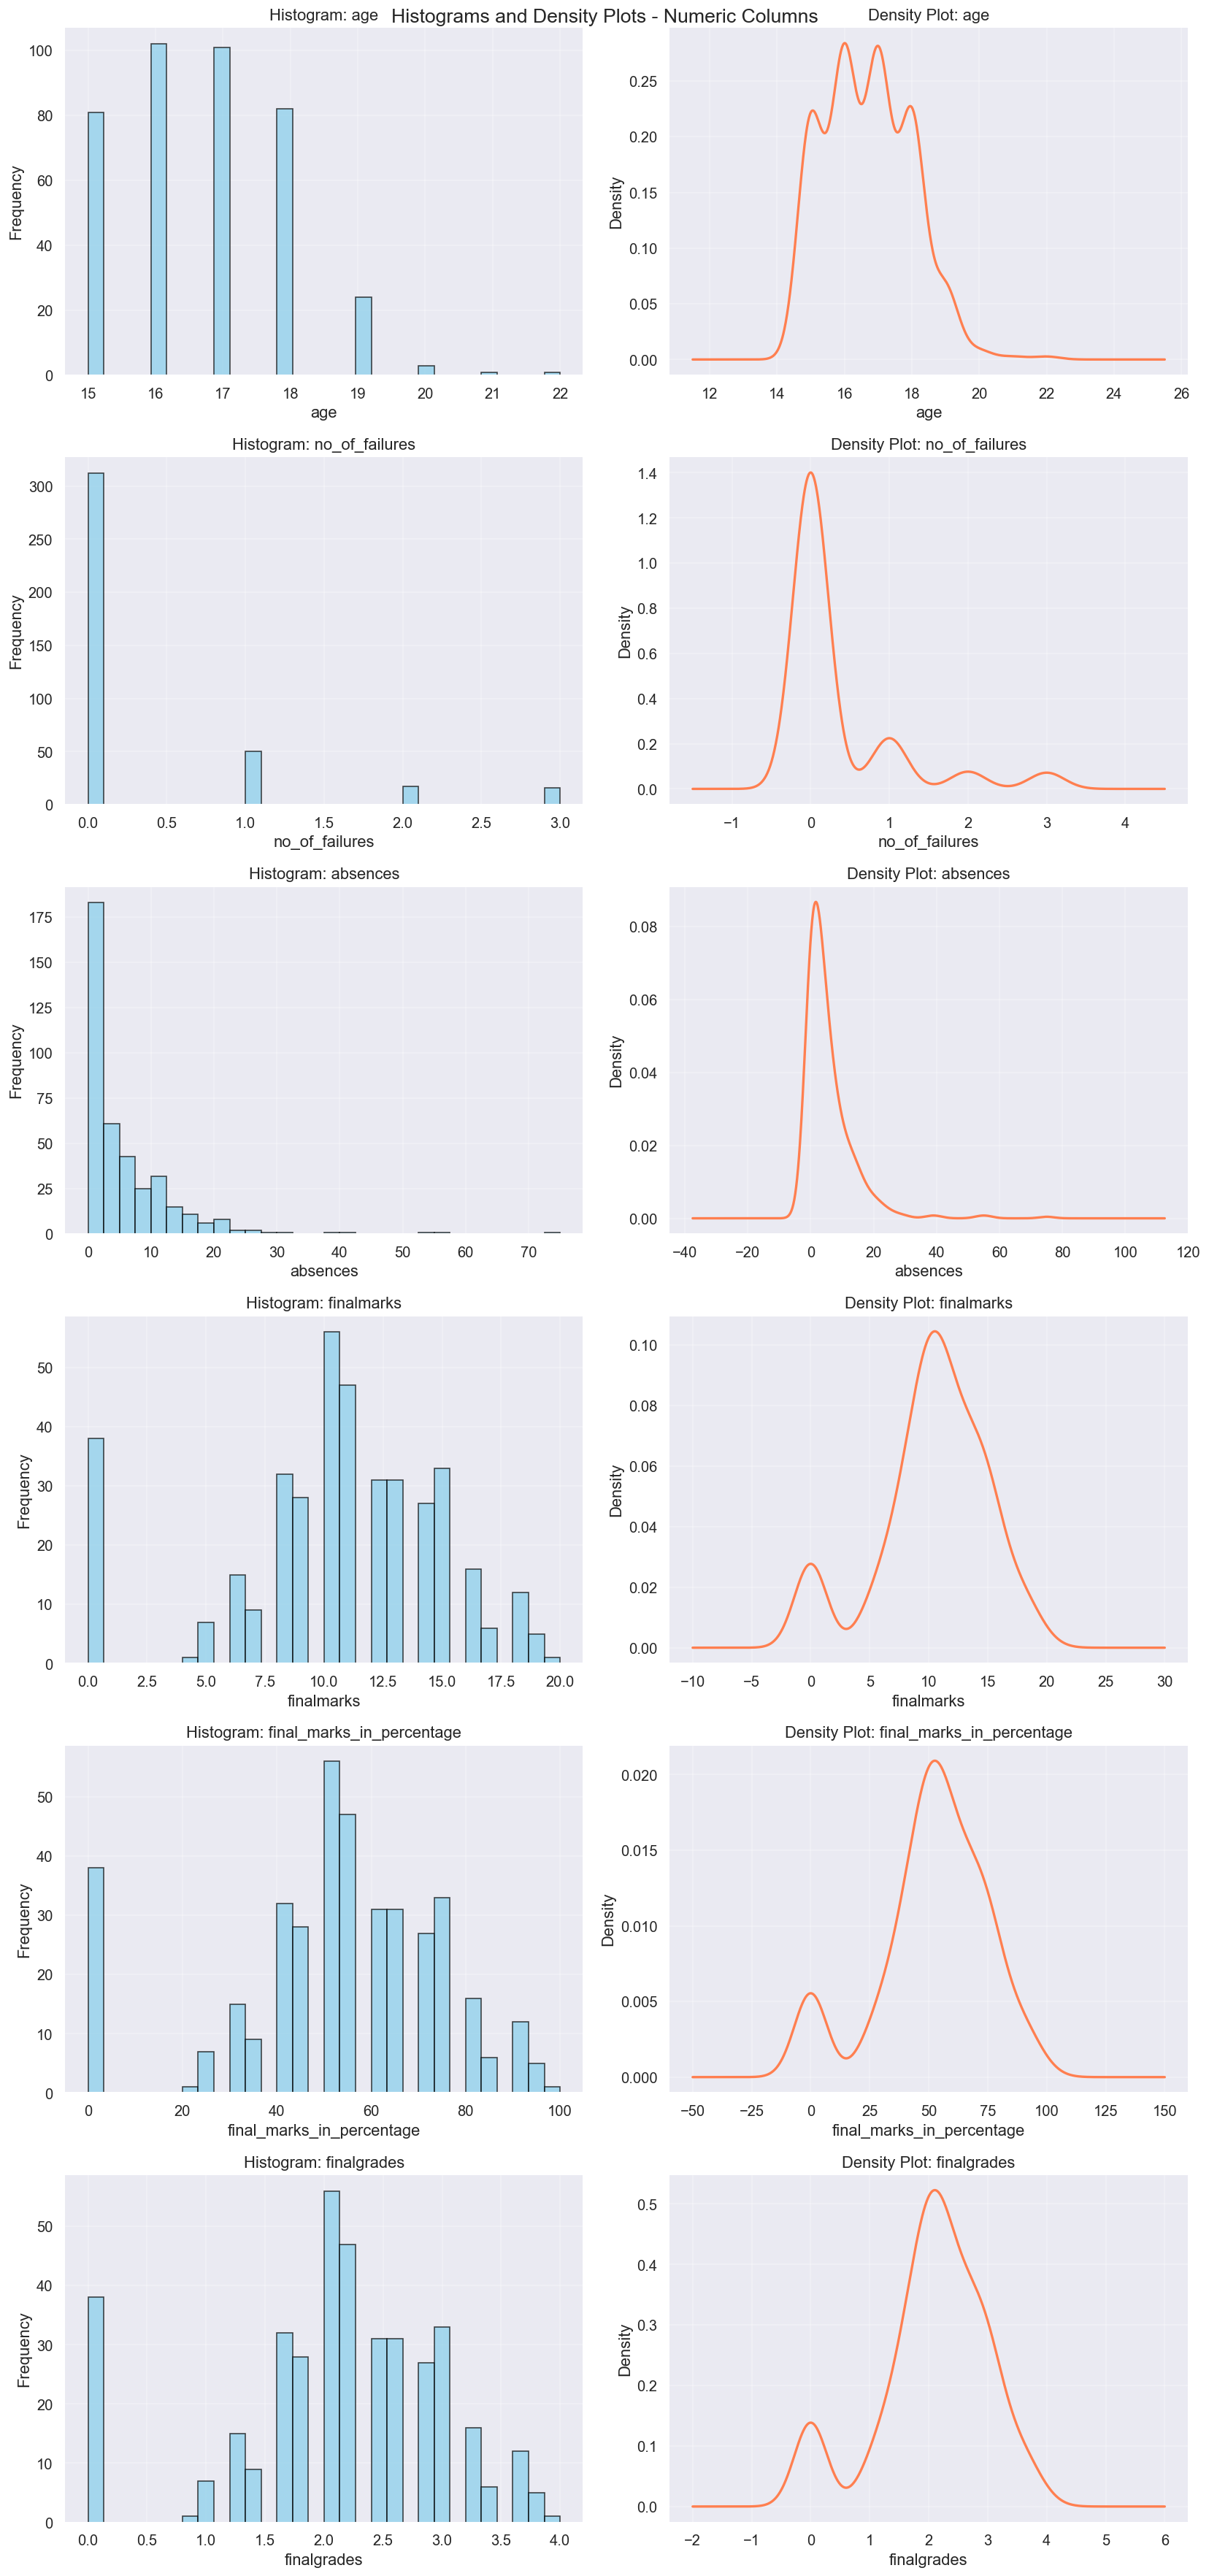

✓ Histograms complete!


In [23]:
if len(numerical_columns) > 0:
    n_cols = 2
    n_rows = len(numerical_columns)
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(14, 5*n_rows))
    if len(numerical_columns) == 1:
        axes = np.array([axes])
    
    axes_flat = axes.reshape(-1, 2)
    
    for idx, col in enumerate(numerical_columns):
        # Histogram
        axes_flat[idx][0].hist(df[col].dropna(), bins=30, edgecolor='black', alpha=0.7, color='skyblue')
        axes_flat[idx][0].set_xlabel(col)
        axes_flat[idx][0].set_ylabel('Frequency')
        axes_flat[idx][0].set_title(f'Histogram: {col}')
        axes_flat[idx][0].grid(alpha=0.3)
        
        # Density plot
        df[col].plot(kind='density', ax=axes_flat[idx][1], color='coral', linewidth=2)
        axes_flat[idx][1].set_xlabel(col)
        axes_flat[idx][1].set_ylabel('Density')
        axes_flat[idx][1].set_title(f'Density Plot: {col}')
        axes_flat[idx][1].grid(alpha=0.3)
    
    plt.suptitle('Histograms and Density Plots - Numeric Columns', fontsize=16)
    plt.tight_layout()
    plt.show()
    print("✓ Histograms complete!")

### Bar Chart

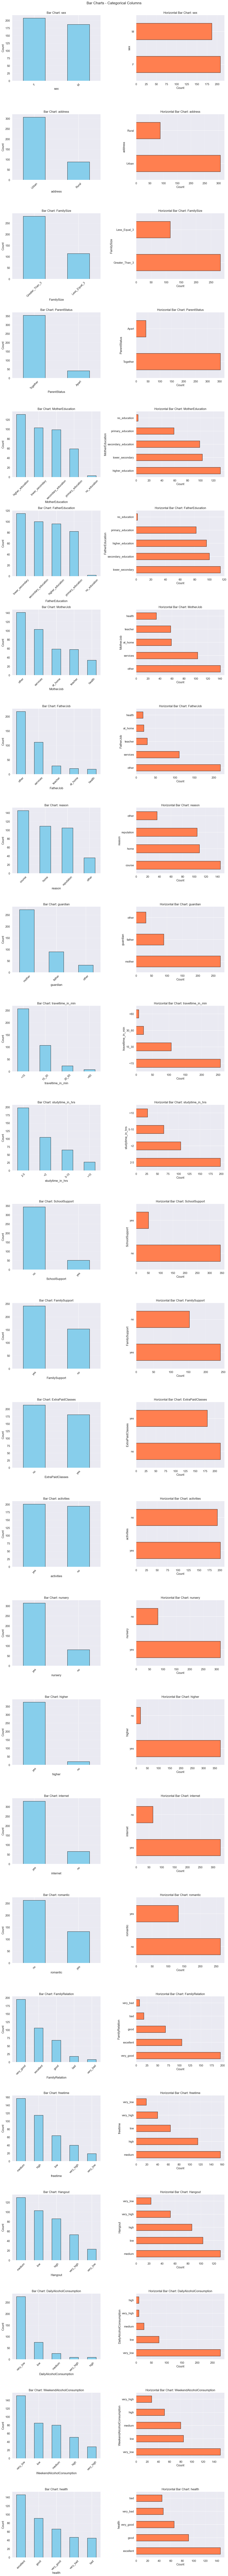

✓ Bar charts complete!


In [24]:
if len(categorical_columns) > 0:
    n_cols = 2
    n_rows = len(categorical_columns)
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(14, 6*n_rows))
    if len(categorical_columns) == 1:
        axes = np.array([axes])
    
    axes_flat = axes.reshape(-1, 2)
    
    for idx, col in enumerate(categorical_columns):
        value_counts = df[col].value_counts()
        
        # Vertical bar chart
        value_counts.plot(kind='bar', color='skyblue', edgecolor='black', ax=axes_flat[idx][0])
        axes_flat[idx][0].set_xlabel(col)
        axes_flat[idx][0].set_ylabel('Count')
        axes_flat[idx][0].set_title(f'Bar Chart: {col}')
        axes_flat[idx][0].tick_params(axis='x', rotation=45)
        axes_flat[idx][0].grid(alpha=0.3, axis='y')
        
        # Horizontal bar chart
        value_counts.plot(kind='barh', color='coral', edgecolor='black', ax=axes_flat[idx][1])
        axes_flat[idx][1].set_xlabel('Count')
        axes_flat[idx][1].set_ylabel(col)
        axes_flat[idx][1].set_title(f'Horizontal Bar Chart: {col}')
        axes_flat[idx][1].grid(alpha=0.3, axis='x')
    
    plt.suptitle('Bar Charts - Categorical Columns', fontsize=16,y=1)
    plt.tight_layout()
    plt.show()
    print("✓ Bar charts complete!")

### Geopandas

No lat/lon columns found. Creating sample data around Kathmandu...
Loading world map data...


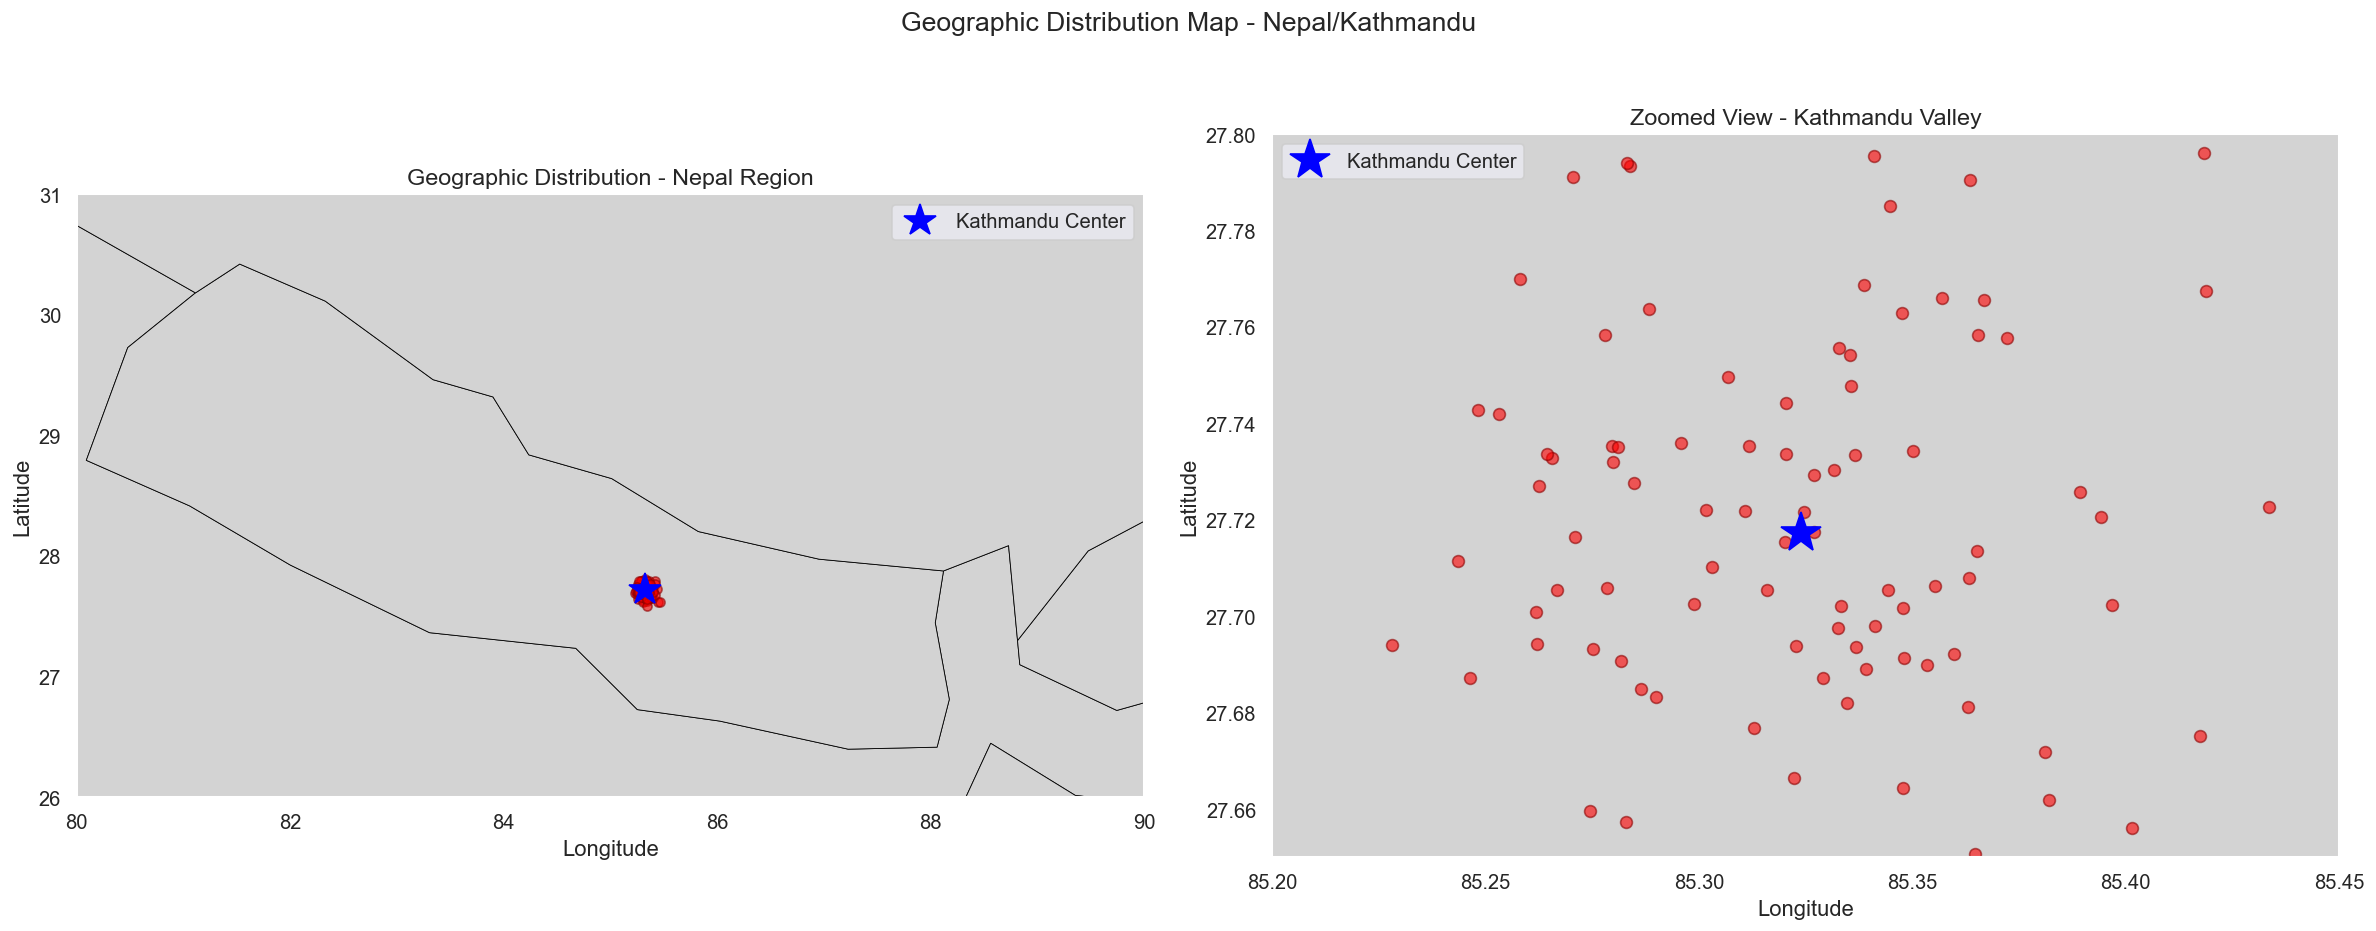

✓ GeoPandas plot complete!
  Total points plotted: 100


In [25]:
try:
    import geopandas as gpd
    from shapely.geometry import Point
    
    # Kathmandu coordinates: approximately 27.7172°N, 85.3240°E
    # Creating sample data points around Kathmandu if your df doesn't have lat/lon
    
    if 'latitude' in df.columns and 'longitude' in df.columns:
        # Use existing latitude/longitude from dataframe
        print("Using latitude/longitude columns from dataframe")
        geometry = [Point(xy) for xy in zip(df['longitude'], df['latitude'])]
        gdf = gpd.GeoDataFrame(df, geometry=geometry, crs='EPSG:4326')
    else:
        # Create sample points around Kathmandu for demonstration
        print("No lat/lon columns found. Creating sample data around Kathmandu...")
        np.random.seed(42)
        n_points = min(100, len(df))
        
        # Generate random points around Kathmandu (27.7172°N, 85.3240°E)
        sample_lats = 27.7172 + np.random.randn(n_points) * 0.05  # ~5km radius
        sample_lons = 85.3240 + np.random.randn(n_points) * 0.05
        
        geometry = [Point(lon, lat) for lon, lat in zip(sample_lons, sample_lats)]
        gdf = gpd.GeoDataFrame(df.head(n_points), geometry=geometry, crs='EPSG:4326')
    
    # Load world map from Natural Earth (works with newer GeoPandas versions)
    print("Loading world map data...")
    world_url = "https://naciscdn.org/naturalearth/110m/cultural/ne_110m_admin_0_countries.zip"
    world = gpd.read_file(world_url)
    
    # Filter to show Nepal and surrounding region
    nepal_region = world[world['NAME'].isin(['Nepal', 'India', 'China', 'Bangladesh', 'Bhutan'])]
    
    # Create figure with two subplots
    fig, axes = plt.subplots(1, 2, figsize=(20, 8))
    
    # Subplot 1: Regional view (Nepal and neighbors)
    nepal_region.plot(ax=axes[0], color='lightgray', edgecolor='black', linewidth=0.5)
    gdf.plot(ax=axes[0], markersize=30, color='red', alpha=0.6, edgecolor='darkred')
    axes[0].set_xlim(80, 90)  # Focus on Nepal region
    axes[0].set_ylim(26, 31)
    axes[0].set_title('Geographic Distribution - Nepal Region', fontsize=14)
    axes[0].set_xlabel('Longitude')
    axes[0].set_ylabel('Latitude')
    axes[0].grid(True, alpha=0.3)
    
    # Add Kathmandu marker
    axes[0].plot(85.3240, 27.7172, 'b*', markersize=20, label='Kathmandu Center')
    axes[0].legend()
    
    # Subplot 2: Zoomed view (Kathmandu valley)
    nepal_region.plot(ax=axes[1], color='lightgray', edgecolor='black', linewidth=0.5)
    gdf.plot(ax=axes[1], markersize=50, color='red', alpha=0.6, edgecolor='darkred')
    axes[1].set_xlim(85.2, 85.45)  # Kathmandu valley
    axes[1].set_ylim(27.65, 27.8)
    axes[1].set_title('Zoomed View - Kathmandu Valley', fontsize=14)
    axes[1].set_xlabel('Longitude')
    axes[1].set_ylabel('Latitude')
    axes[1].grid(True, alpha=0.3)
    
    # Add Kathmandu marker
    axes[1].plot(85.3240, 27.7172, 'b*', markersize=25, label='Kathmandu Center')
    axes[1].legend()
    
    plt.suptitle('Geographic Distribution Map - Nepal/Kathmandu', fontsize=16)
    plt.tight_layout()
    plt.show()
    print("✓ GeoPandas plot complete!")
    print(f"  Total points plotted: {len(gdf)}")
    
except ImportError as e:
    print("GeoPandas not installed. Install with: pip install geopandas")
    print(f"Error: {e}")
except Exception as e:
    print(f"Geographic plot error: {e}")
    print("Trying alternative approach...")
    
    try:
        # Alternative: Simple plot without background map
        import geopandas as gpd
        from shapely.geometry import Point
        
        if 'latitude' not in df.columns or 'longitude' not in df.columns:
            print("Creating sample data around Kathmandu...")
            np.random.seed(42)
            n_points = min(100, len(df))
            sample_lats = 27.7172 + np.random.randn(n_points) * 0.05
            sample_lons = 85.3240 + np.random.randn(n_points) * 0.05
        else:
            sample_lats = df['latitude'].values
            sample_lons = df['longitude'].values
            n_points = len(df)
        
        # Simple scatter plot with Nepal outline approximation
        fig, ax = plt.subplots(figsize=(15, 10))
        
        # Plot data points
        ax.scatter(sample_lons, sample_lats, c='red', s=50, alpha=0.6, 
                  edgecolors='darkred', linewidth=1, label='Data Points')
        
        # Add Kathmandu center
        ax.plot(85.3240, 27.7172, 'b*', markersize=30, label='Kathmandu Center', 
               markeredgecolor='darkblue', markeredgewidth=2)
        
        # Draw approximate Nepal boundary box
        nepal_box_lon = [80.05, 88.20, 88.20, 80.05, 80.05]
        nepal_box_lat = [26.35, 26.35, 30.45, 30.45, 26.35]
        ax.plot(nepal_box_lon, nepal_box_lat, 'k--', linewidth=2, label='Nepal (approx)')
        
        ax.set_xlim(85.0, 85.6)  # Focus on Kathmandu region
        ax.set_ylim(27.5, 27.9)
        ax.set_xlabel('Longitude', fontsize=12)
        ax.set_ylabel('Latitude', fontsize=12)
        ax.set_title('Geographic Distribution - Kathmandu Region', fontsize=16)
        ax.grid(True, alpha=0.3)
        ax.legend()
        
        plt.tight_layout()
        plt.show()
        print("✓ Simple geographic plot complete!")
        print(f"  Total points plotted: {n_points}")
        
    except Exception as e2:
        print(f"Alternative plot also failed: {e2}")

### Outliers Detection for Numerical Columns

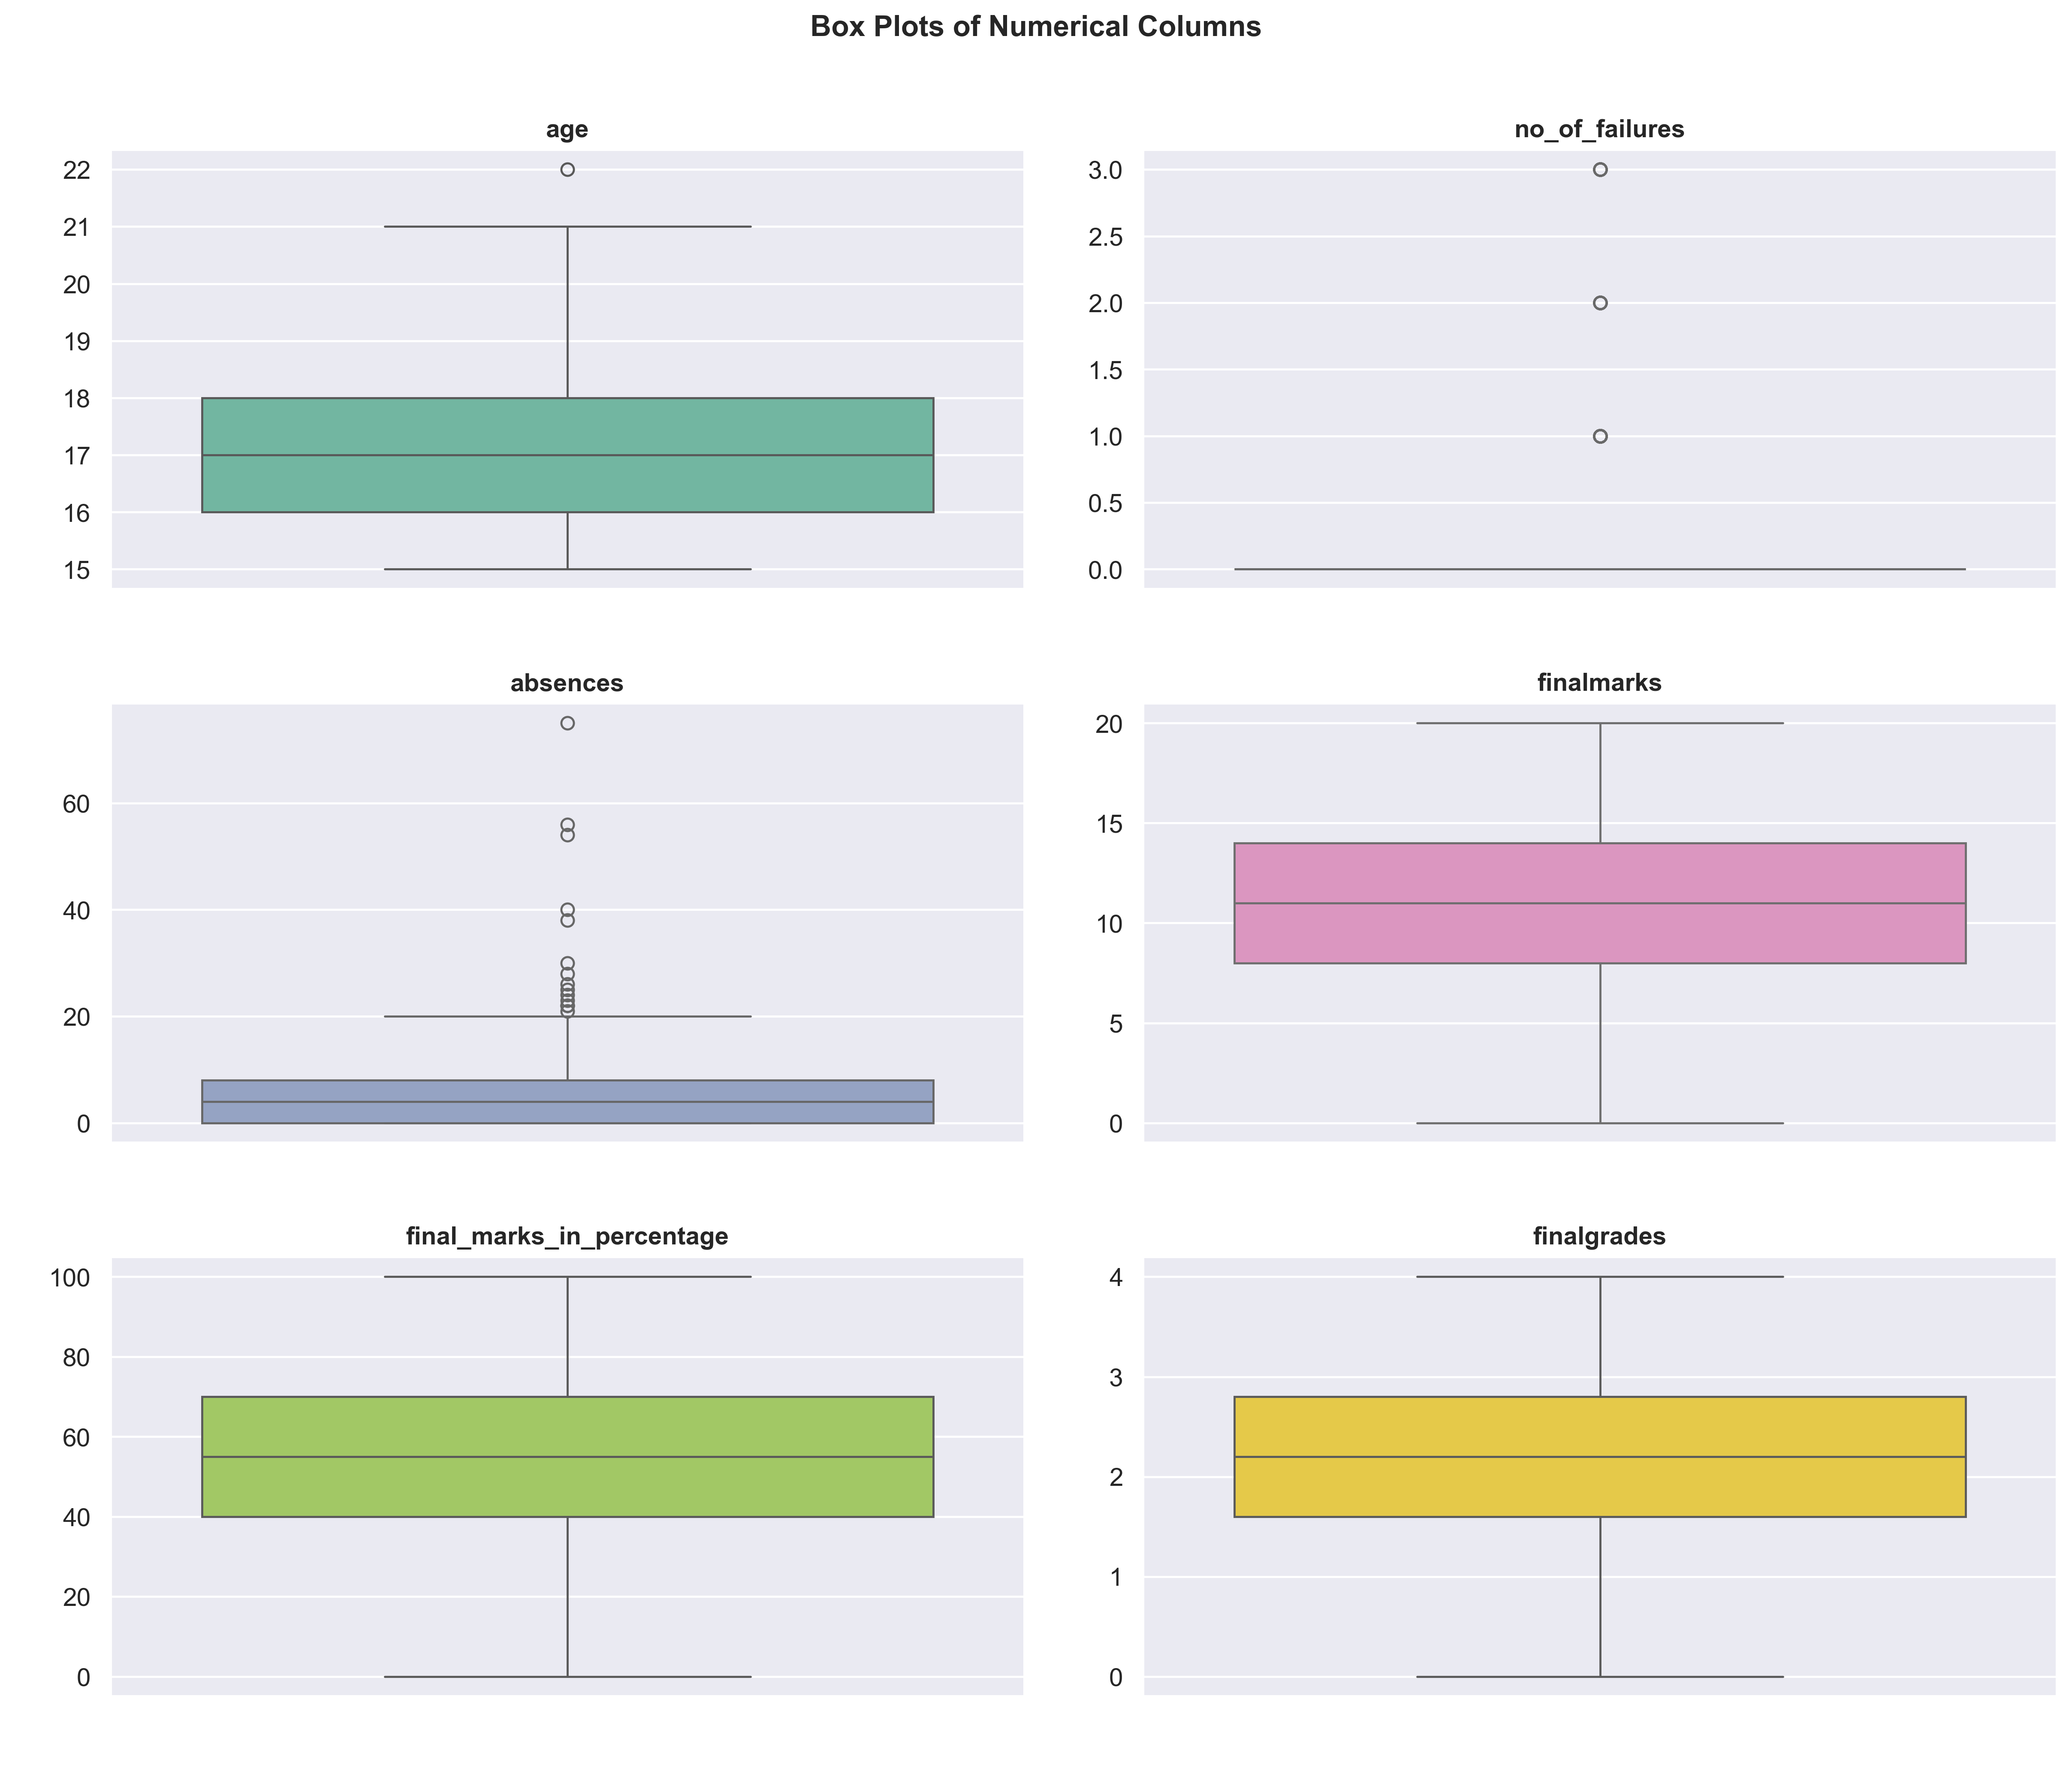

In [26]:
sns.set(style='darkgrid',palette='hls',font_scale=1.1)

fig, axes = plt.subplots(nrows=3,ncols=2, figsize=(14,12),dpi=350)
axes=axes.flatten()
colors=sns.color_palette("Set2",n_colors=len(numerical_columns))

for idx,column in enumerate(numerical_columns):
    sns.boxplot(
        y=df[column],
        ax=axes[idx],
        color=colors[idx]
    )
    axes[idx].set_title(column,fontsize=12,fontweight='bold')
    axes[idx].set_xlabel(" ")
    axes[idx].set_ylabel(" ")

    for idx in range(len(numerical_columns),len(axes)):
        fig.delaxes(axes[idx])

plt.suptitle(
    "Box Plots of Numerical Columns",
    fontsize=14,
    fontweight='bold'
)

plt.tight_layout(rect=[0,0,1,0.97])
plt.show()


## Procedure to Remove outliers form the Numerical Columns (if Necessary)

#### Visual Inspection

You can use visualizations like:
- **Histograms**: Show the shape of the distribution.
- **QQ Plots (Quantile-Quantile plots)**: Compare the quantiles of your data against those expected from a normal distribution.

A **linear pattern** in a QQ plot suggests the data is approximately normally distributed.

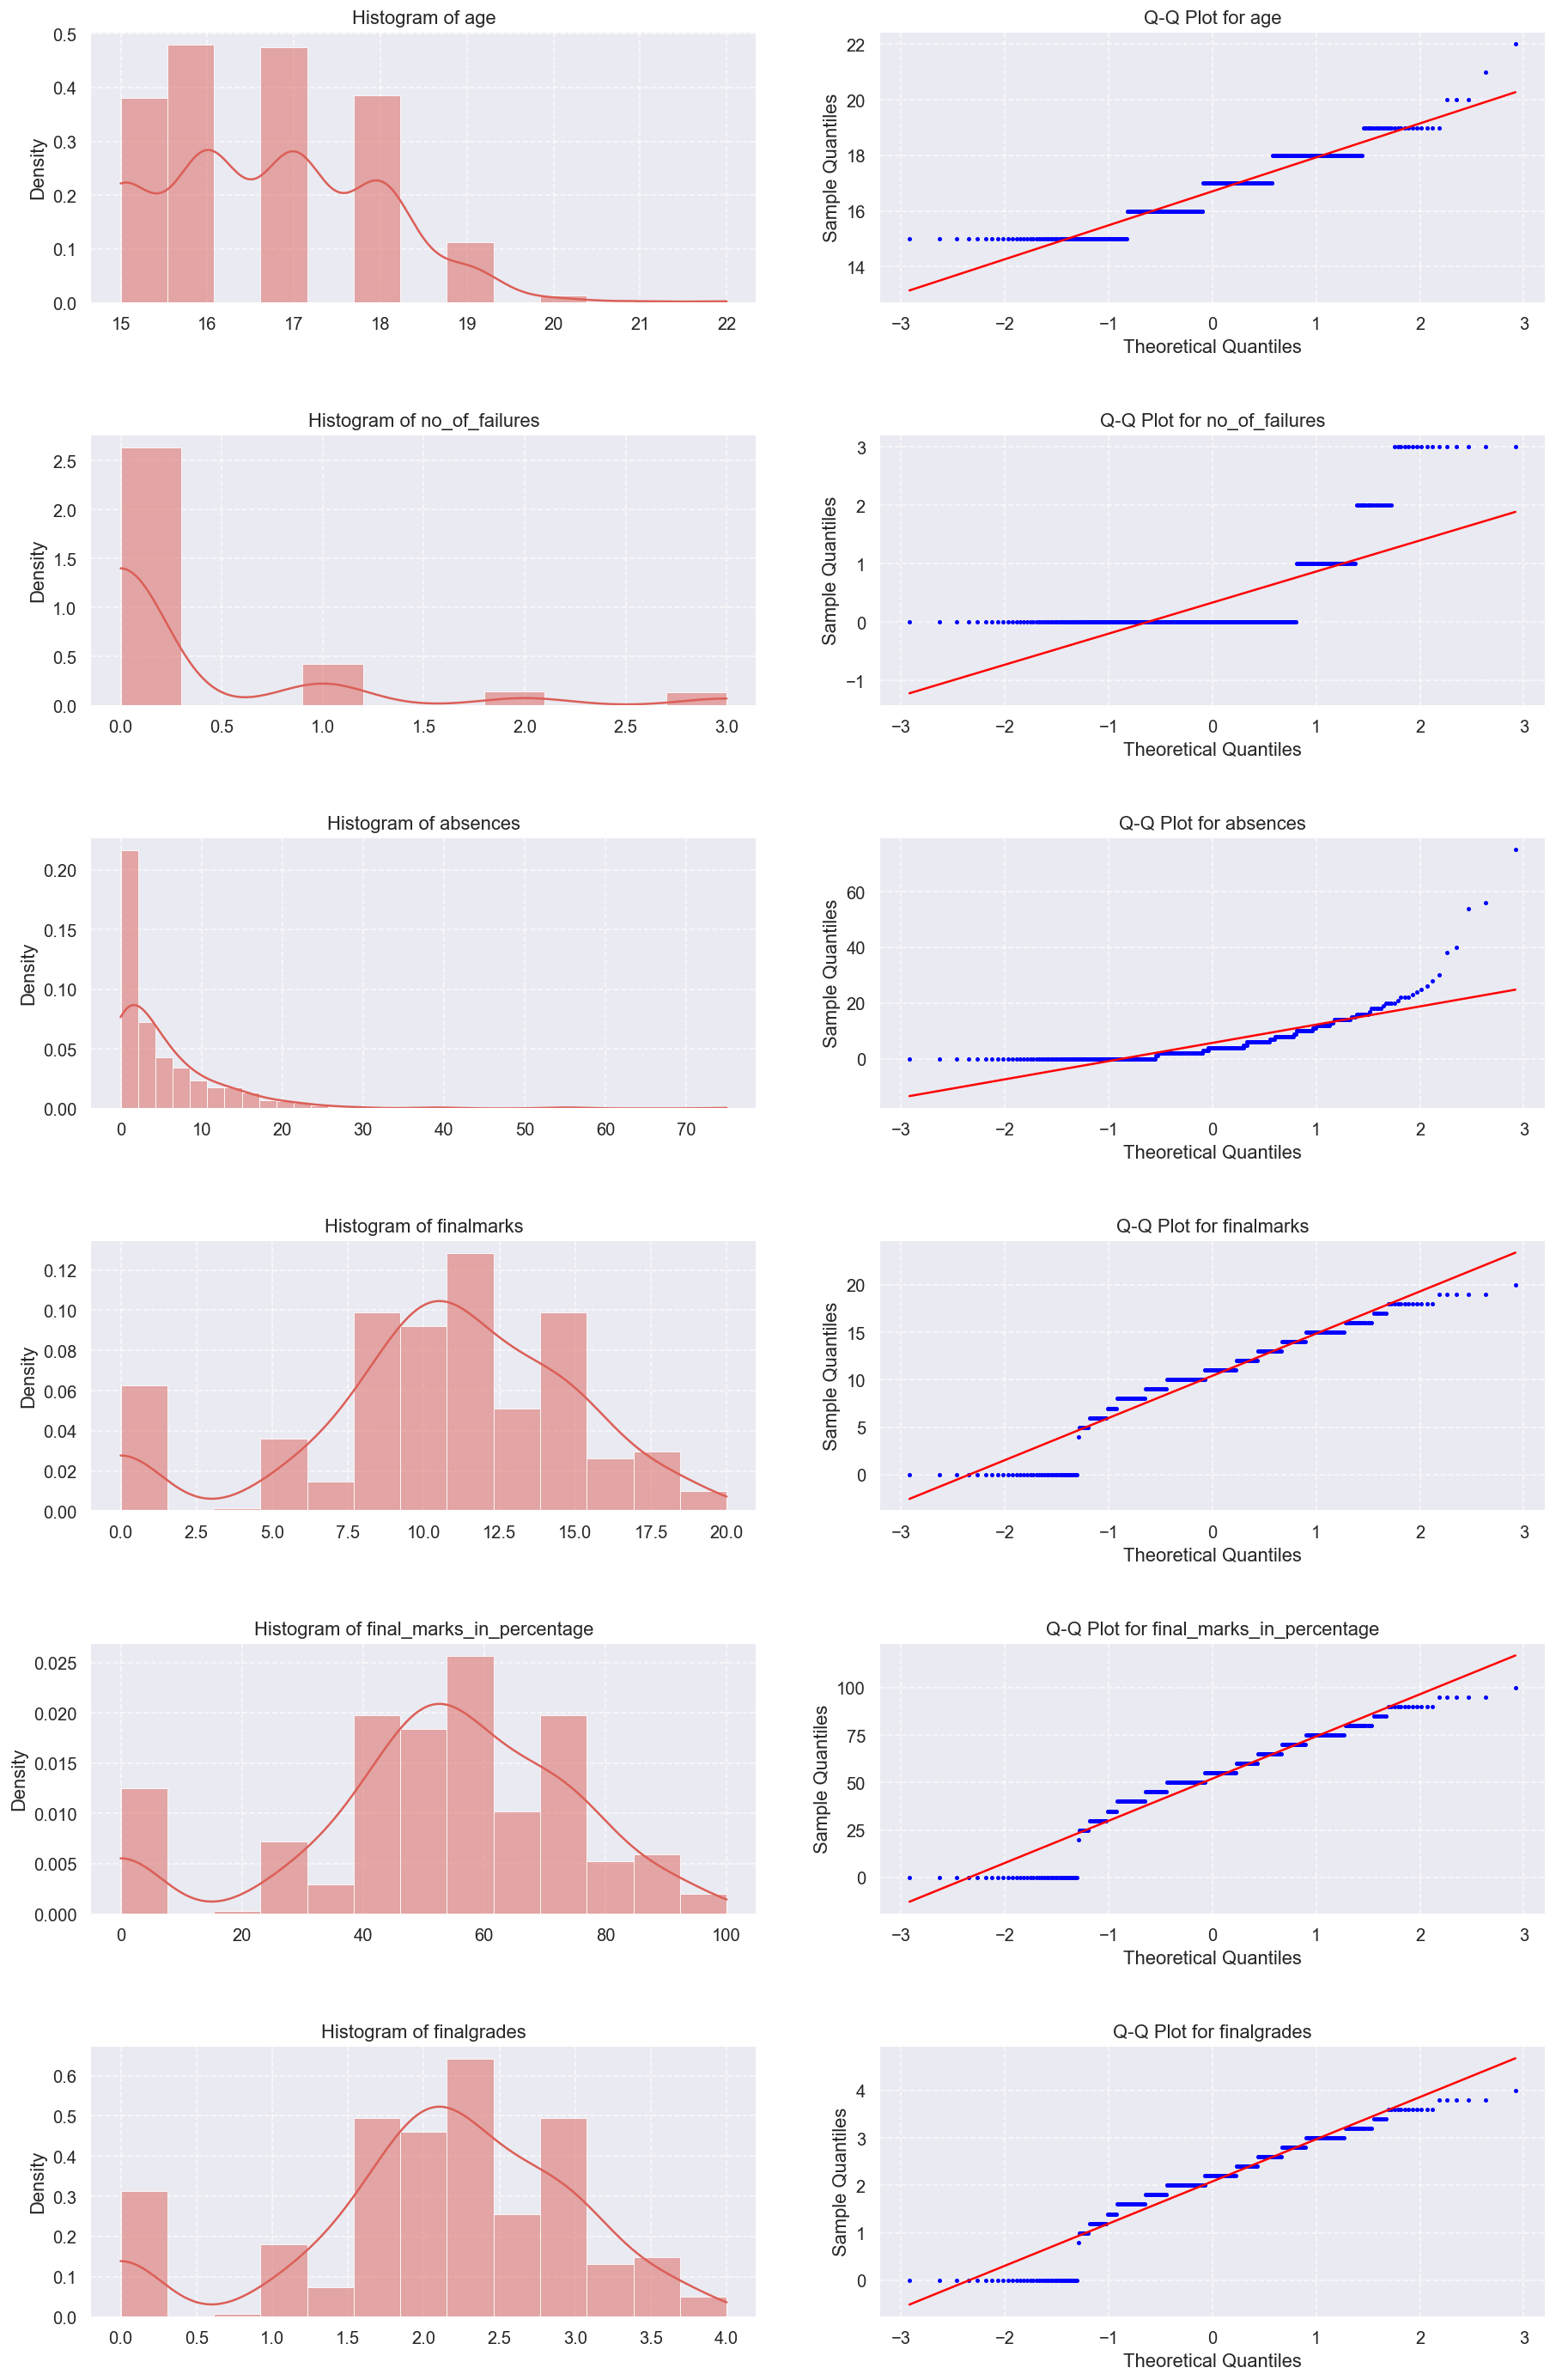

In [29]:
# Create a figure and axes for subplots
num_cols = len(numerical_columns)
fig, axes = plt.subplots(num_cols, 2, figsize=(16, num_cols*4))

#Plotting histograms and Q-Q plots for each numerical column
for i, col in enumerate(numerical_columns):
    #Histogram on the left subplot
    sns.histplot(df[col], kde= True, ax = axes[i,0], stat='density', linewidth=0.5)
    axes[i,0].set_title(f'Histogram of {col}')
    axes[i,0].set_xlabel('')
    axes[i,0].grid(True, linestyle='--',alpha=0.7)


    ##Q-Q plot on the right subplot
    stats.probplot(df[col],plot=axes[i,1],dist='norm',fit=True)
    axes[i,1].get_lines()[0].set_markersize(2.0) # Adjust marker size for clarity
    axes[i,1].grid(True, linestyle='--', alpha=0.7)
    axes[i,1].set_title(f'Q-Q Plot for {col}')
    axes[i,1].set_xlabel('Theoretical Quantiles')
    axes[i,1].set_ylabel('Sample Quantiles')

# Adjust layout and display the plots
plt.tight_layout(pad=3.0)
plt.show()

### Statiscal Tests

To determine whether a numerical column is normally distributed, you can apply formal statiscal tests such as:

- **Shapiro-Wilk Test**
- **Kolmogorov-Smirnov (K-S) Test**
- **Anderson-Darling Test**
- **Lilliefors Test (variant of K-S test with estimated parameters)**
- **D'Agostino and Pearson's Test (aka normaltest in SciPy)**
- **Jarque-Bera Test**

These tests evaluate whether the sample data significantly deviates from a normal distribution.

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import (
    anderson,
    jarque_bera,
    shapiro,
    normaltest,
    kstest
)
from statsmodels.stats.diagnostic import lilliefors

# Define the normality test function
def test_normality(df, col):
    print("="*60)
    print(f" Normality Tests for Column: *{col}*")
    print("-" * 60)

    # 1. Shapiro-Wilk Test
    stat, p = shapiro(df[col])
    print(f" Shapiro-Wilk Test       : Stat = {stat:.4f}, p = {p:.4f}   →  {' Normal' if p > 0.05 else ' Not normal'}")

    # 2. Anderson-Darling Test
    result = anderson(df[col])
    crit_value = result.critical_values[2]  # 5% significance level
    print(f" Anderson-Darling Test   : Stat = {result.statistic:.4f}, Critical @5% = {crit_value:.4f}   →  {' Normal' if result.statistic < crit_value else ' Not normal'}")

    # 3. Jarque-Bera Test
    jb_stat, jb_p = jarque_bera(df[col])
    print(f" Jarque-Bera Test        : Stat = {jb_stat:.4f}, p = {jb_p:.4f}   →  {' Normal' if jb_p > 0.05 else ' Not normal'}")

    # 4. D’Agostino and Pearson’s Test
    dag_stat, dag_p = normaltest(df[col])
    print(f" D’Agostino & Pearson    : Stat = {dag_stat:.4f}, p = {dag_p:.4f}   →  {' Normal' if dag_p > 0.05 else ' Not normal'}")

    # 5. Kolmogorov-Smirnov Test
    ks_stat, ks_p = kstest(df[col], 'norm', args=(df[col].mean(), df[col].std()))
    print(f" Kolmogorov-Smirnov Test : Stat = {ks_stat:.4f}, p = {ks_p:.4f}   →  {' Normal' if ks_p > 0.05 else ' Not normal'}")

    # 6. Lilliefors Test
    lillie_stat, lillie_p = lilliefors(df[col])
    print(f" Lilliefors Test         : Stat = {lillie_stat:.4f}, p = {lillie_p:.4f}   →  {' Normal' if lillie_p > 0.05 else ' Not normal'}")

    print("\n")


for col in numerical_columns:
    test_normality(df, col)

 Normality Tests for Column: *age*
------------------------------------------------------------
 Shapiro-Wilk Test       : Stat = 0.9117, p = 0.0000   →   Not normal
 Anderson-Darling Test   : Stat = 12.1586, Critical @5% = 0.7790   →   Not normal
 Jarque-Bera Test        : Stat = 13.4206, p = 0.0012   →   Not normal
 D’Agostino & Pearson    : Stat = 12.7697, p = 0.0017   →   Not normal
 Kolmogorov-Smirnov Test : Stat = 0.1739, p = 0.0000   →   Not normal
 Lilliefors Test         : Stat = 0.1739, p = 0.0010   →   Not normal


 Normality Tests for Column: *no_of_failures*
------------------------------------------------------------
 Shapiro-Wilk Test       : Stat = 0.5071, p = 0.0000   →   Not normal
 Anderson-Darling Test   : Stat = 87.5779, Critical @5% = 0.7790   →   Not normal
 Jarque-Bera Test        : Stat = 771.7067, p = 0.0000   →   Not normal
 D’Agostino & Pearson    : Stat = 200.3287, p = 0.0000   →   Not normal
 Kolmogorov-Smirnov Test : Stat = 0.4633, p = 0.0000   →   Not no

## Function to remove outliers using IQR Method

In [33]:
def remove_outliers_iqr(data):
    cleaned_data = data.copy()


    for col in data.columns:
        if col in numerical_columns: # Process only numerical columns
            Q1 = data[col].quantile(0.25)
            Q3 = data[col].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5* IQR
            upper_bound = Q3 + 1.5* IQR
            cleaned_data = cleaned_data[(cleaned_data[col]>= lower_bound) & (cleaned_data[col]<= upper_bound)]

    return cleaned_data
cleaned_data_iqr = remove_outliers_iqr(df)
print("DataFrame after removing outliers using IQR method:")
print(cleaned_data_iqr)

DataFrame after removing outliers using IQR method:
    sex   age address      FamilySize ParentStatus      MotherEducation  \
0     F  18.0   Urban  Greater_Than_3        Apart     higher_education   
1     F  17.0   Urban  Greater_Than_3     Together    primary_education   
3     F  15.0   Urban  Greater_Than_3     Together     higher_education   
4     F  16.0   Urban  Greater_Than_3     Together  secondary_education   
5     M  16.0   Urban    Less_Equal_3     Together     higher_education   
..   ..   ...     ...             ...          ...                  ...   
386   F  18.0   Rural  Greater_Than_3     Together     higher_education   
388   F  18.0   Urban    Less_Equal_3     Together  secondary_education   
391   M  17.0   Urban    Less_Equal_3     Together  secondary_education   
393   M  18.0   Rural    Less_Equal_3     Together  secondary_education   
394   M  19.0   Urban    Less_Equal_3     Together    primary_education   

         FatherEducation MotherJob FatherJob   

## Exploratory Data Analysis

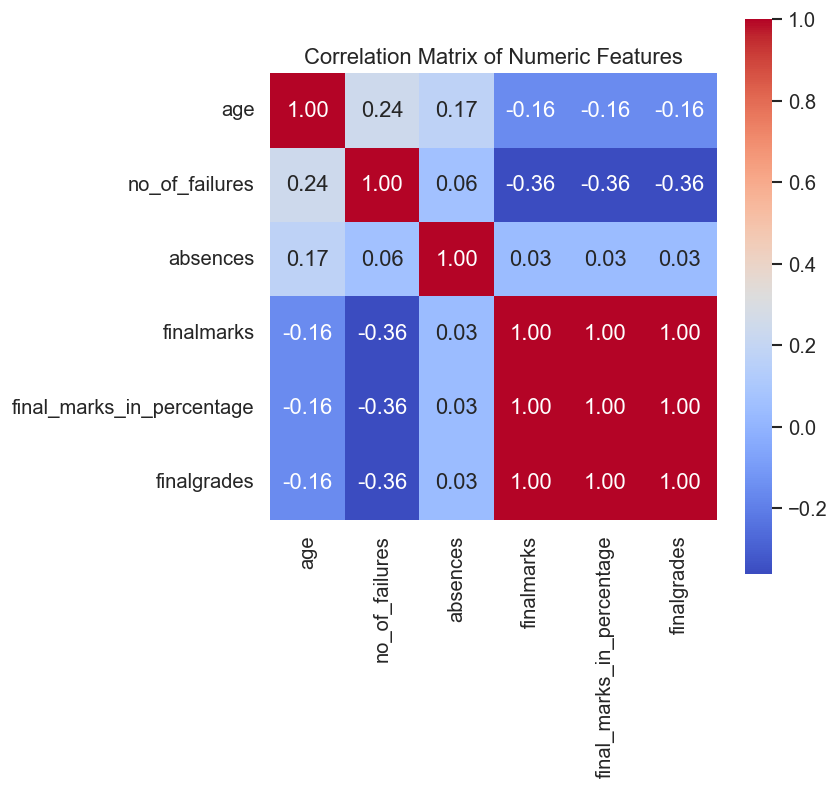

In [40]:
numeric_data = df[numerical_columns]

# Compute pairwise correlation of numeric columns
correlation_matrix = numeric_data.corr()

#Plotting correlation heatmap
plt.figure(figsize=(6,6))
sns.heatmap(correlation_matrix, annot= True, cmap='coolwarm',fmt=".2f", square=True)
plt.title('Correlation Matrix of Numeric Features')
plt.show()

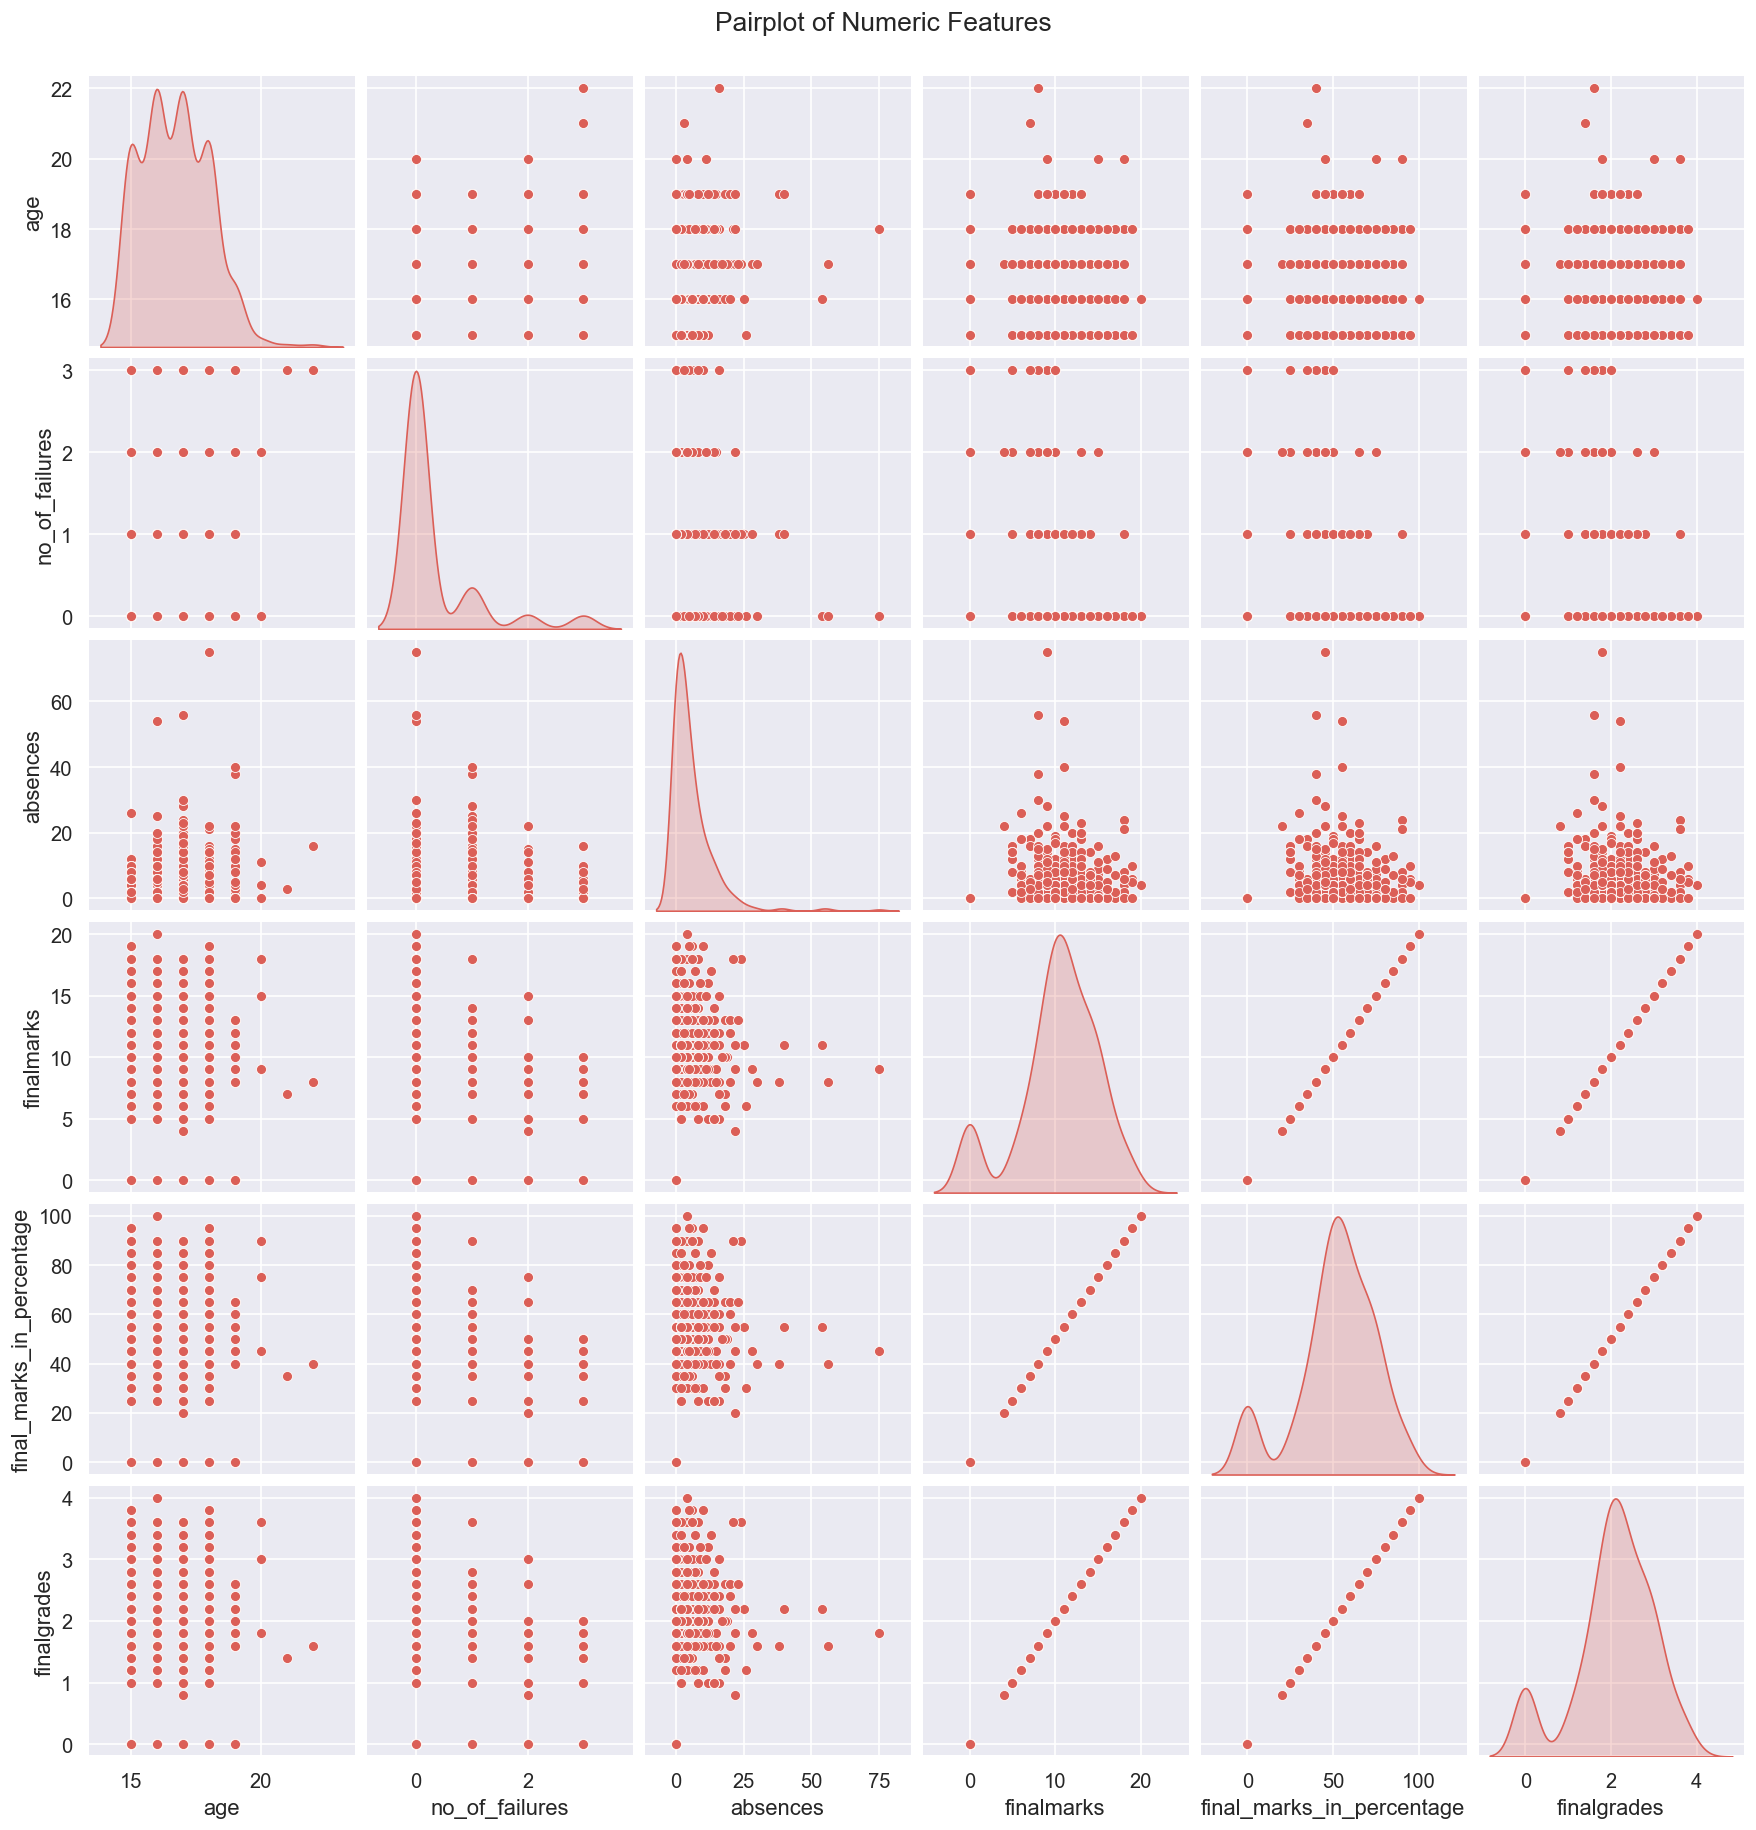

In [41]:
# Pairplot of numeric features
sns.pairplot(df[numerical_columns], diag_kind='kde')
plt.suptitle("Pairplot of Numeric Features", y=1.02)
plt.show()